                                                                          Assignment 3
                                                          Defining and Solving Reinforcement Learning Task                                                              
                                                              SaiKumar Nalla & Chittem Sai Sahithi

# PART - 1: DEFINING AN RL ENVIRONMENT

### STEP - 1: CHOOSING A SCENARIO FOR GRID WORLD

- **Theme**: We have chosen a Gem Hunt grid world as our theme where the agent aims to find the treasure in a 3*4 grid. We have chosen to store the gem at top-right position of the grid, when the agent reaches this position he will be rewarded 10. For every wrong step the agent goes, the agent will be penalized with 0.1 points, and there is a rock in our grid at a position which is diagonal to the treasure, which will be penalized with 10 points. So, the agent should continue in the search of the gem to reach the aim avoiding the hazard.
- **States**: We have defined total of 12 states which are S1, S2, ...S11, S12.
- **Actions**: There are 4 actions provided for the agent to find the gem hunt which are: {Up, Down, Right, Left}
- **Objective**: Reach the goal state to get the maximum reward.

In [ ]:
# Importing required libraries
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import random

### STEP - 2: DEFINE AN RL ENVIRONMENT DEFINED IN THE THEME

In [ ]:
from matplotlib.colors import ListedColormap
from gym import spaces

class GemHuntEnv():

  def __init__(self):
    # Initializes the class, action and observation space

    # Defining the grid size which is a 3*4 matrix
    self.grid_size = 3, 4

    self.observation_space = spaces.Discrete(np.prod(self.grid_size))
    self.action_space = spaces.Discrete(4)

    # Defining the positions for the agent, treasure and hazard
    self.current_pos = 0
    self.gem_pos = 3
    self.rock_pos = 6
    
    # Defining the rewards
    self.reward_dictionary = {}
    self.reward_dictionary[self.gem_pos] = 10
    self.reward_dictionary[self.rock_pos] = -10
    self.reward_range = (-10, 10)

    # Calling reset method to get back to the initial position
    self.reset()

  def reset(self):
    # Resets the state of the environment to an initial position

    self.current_pos = 0
    self.agent_pos = 0
    self.state = self.agent_pos

    return self.state

  def move_agent(self, action):

    # Actions dictionary contains 4 values where 0,1,2,3 are keys, and actions are values
    actions = {
      0: self.move_up,
      1: self.move_down,
      2: self.move_right,
      3: self.move_left,
    }

    if action in actions:
      actions[action]()
    else:
      print("Invalid action:", action)

  # Defining methods to move the agents according to action
  def move_up(self):
    if self.grid_size[1] <= self.agent_pos:
      self.agent_pos = self.agent_pos - self.grid_size[1]

  def move_down(self):
    if self.grid_size[0] * self.grid_size[1] - self.grid_size[1] > self.agent_pos:
      self.agent_pos = self.agent_pos + self.grid_size[1]

  def move_right(self):
    if (self.agent_pos + 1) % self.grid_size[1] != 0:
      self.agent_pos = self.agent_pos + 1

  def move_left(self):
    if self.agent_pos % self.grid_size[1] != 0:
      self.agent_pos = self.agent_pos - 1

  def step(self, action):
    # Input is the action

    # Define the actions using move_agent() method
    self.move_agent(action)
    self.current_pos += 1
    done = False
    self.state = self.agent_pos

    # Setting the reward based on the reward_dictionary values
    reward = 0
    if self.state in self.reward_dictionary:
      reward = reward + self.reward_dictionary[self.state]
      done = True
    else:
      reward = reward - 0.1

    return self.state, reward, done

  def render(self):
    # Visualizes the environment
  
    # Create a colormap for the grid cells
    cmap = ListedColormap(['darkblue', 'yellow', 'magenta', 'red'])
    
    # Create an empty grid with the correct size
    grid = np.zeros(self.grid_size)
    
    # Place the agent row position
    agent_row, agent_col = divmod(self.agent_pos, self.grid_size[1])
    grid[agent_row, agent_col] = 1
    
    # Place the goal row position
    goal_row, goal_col = divmod(self.gem_pos, self.grid_size[1])
    grid[goal_row, goal_col] = 2
    
    # Place the rock row position
    rock_row, rock_col = divmod(self.rock_pos, self.grid_size[1])
    grid[rock_row, rock_col] = 3
    
    # Show the grid using a color map
    plt.figure(figsize = (6, 8))
    plt.imshow(grid, cmap = cmap, interpolation ='nearest')
    plt.axis('off')
    plt.show()

### STEP - 3: DEFINE RANDOM AGENT FOR 15 STEPS

In [ ]:
class RandomAgent:

  def __init__(self, env):
    self.env = env
    
  def run(self, max_steps):

    # reset the environment to the initial state
    state = self.env.reset()

    for i in range(max_steps):
      
      # choose a random action from the action space
      action = self.env.action_space.sample()
      
      # take a step in the environment using the chosen action
      next_state, reward, done = self.env.step(action)
      
      # Print the current state, chosen action, reward, and info
      print("Step:", i+1)
      print("Current state:", state)
      print("Action taken:", action)
      print("Reward given:", reward)
    
      # Visualize the environment after each step
      print("Rendering environment...")
      print("Yellow: Agent; Pink: Goal; Red: Hazard")
      self.env.render()

      # Update the current state
      state = next_state
      
      # Stop the loop if the episode is finished
      if done:
          break


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


After running the code, the grid will have blue background 

**pink** represents the gem which is the goal

**Red** is the rock (hazard) 

**yellow** is the agent.

Step: 1
Current state: 0
Action taken: 3
Reward given: -0.1
Rendering environment...
Yellow: Agent; Pink: Goal; Red: Hazard


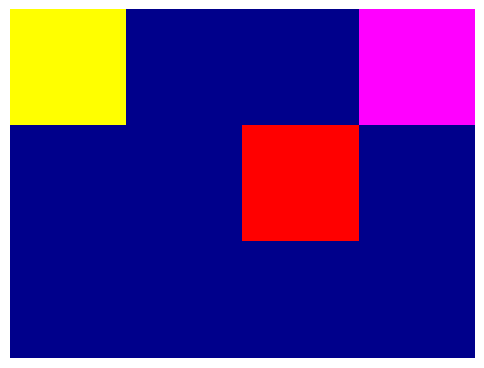

Step: 2
Current state: 0
Action taken: 2
Reward given: -0.1
Rendering environment...
Yellow: Agent; Pink: Goal; Red: Hazard


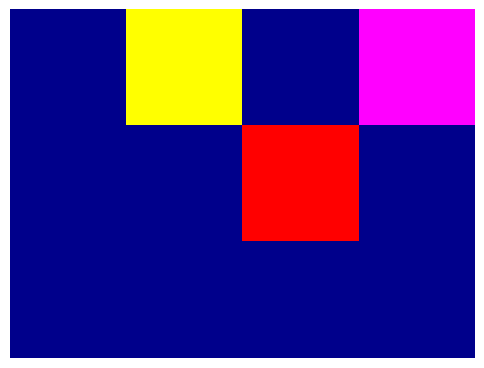

Step: 3
Current state: 1
Action taken: 3
Reward given: -0.1
Rendering environment...
Yellow: Agent; Pink: Goal; Red: Hazard


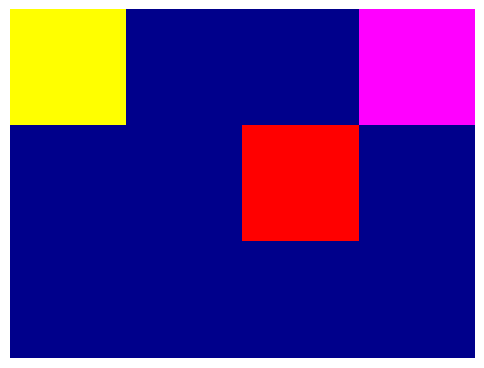

Step: 4
Current state: 0
Action taken: 0
Reward given: -0.1
Rendering environment...
Yellow: Agent; Pink: Goal; Red: Hazard


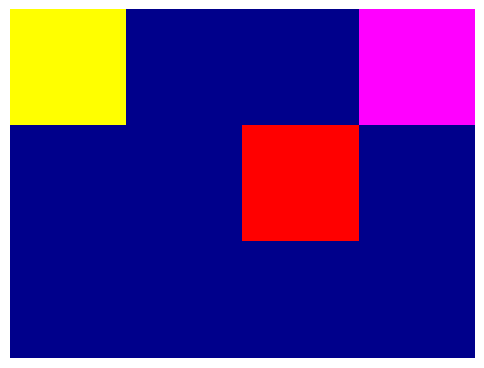

Step: 5
Current state: 0
Action taken: 3
Reward given: -0.1
Rendering environment...
Yellow: Agent; Pink: Goal; Red: Hazard


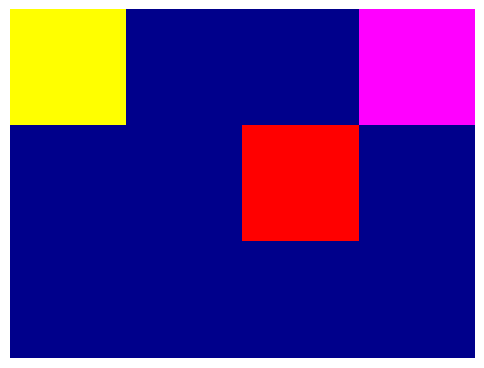

Step: 6
Current state: 0
Action taken: 2
Reward given: -0.1
Rendering environment...
Yellow: Agent; Pink: Goal; Red: Hazard


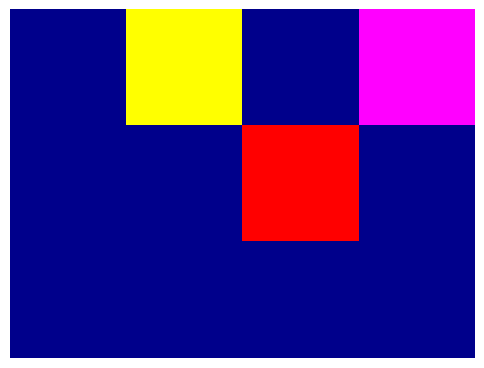

Step: 7
Current state: 1
Action taken: 2
Reward given: -0.1
Rendering environment...
Yellow: Agent; Pink: Goal; Red: Hazard


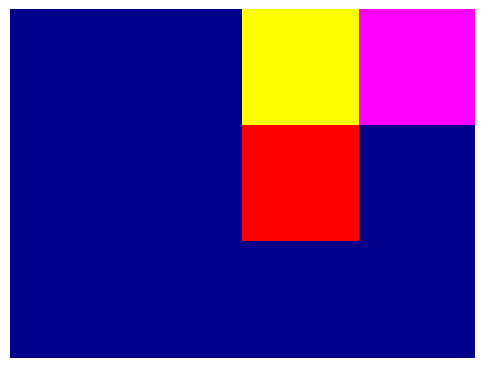

Step: 8
Current state: 2
Action taken: 1
Reward given: -10
Rendering environment...
Yellow: Agent; Pink: Goal; Red: Hazard


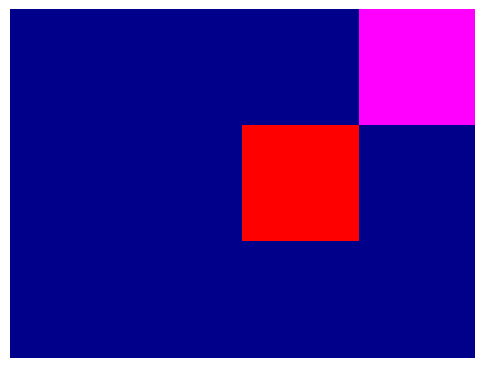

In [ ]:
env = GemHuntEnv()
agent = RandomAgent(env)
# Timesteps = 15
agent.run(15)

# PART - 2 : SOLVING ENVIRONMENT USING SARSA

## STEP - 1: DEFINING SARSA ALGORITHM FOR THE ENVIRONMENT

In [ ]:
import seaborn as sns

class SARSA:  
   
    def __init__(self, env, num_episodes, max_timesteps, alpha, gamma, epsilon, epsilon_decay, epsilon_min):
        self.env = env
        self.num_episodes = num_episodes
        self.max_timesteps = max_timesteps
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.Q = {}
        for state in range(env.observation_space.n):
            self.Q[state] = {}
            for action in range(env.action_space.n):
                self.Q[state][action] = 0
        self.rewards = []
        self.epsilon_vals = []

    def exploratory_action(self, state):
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()
        else:
            actions = list(self.Q[state].keys())
            values = list(self.Q[state].values())
            max_value = max(values)
            max_indices = [i for i, v in enumerate(values) if v == max_value]
            if len(max_indices) == 0:
                return self.env.action_space.sample()
            elif len(max_indices) > 1:
                max_indices = [i for i in max_indices if actions[i] != self.env.action_space.sample()]
                if len(max_indices) == 0:
                    return self.env.action_space.sample()
            return actions[random.choice(max_indices)]

    def q_update(self, state, action, reward, next_state, next_action):
        q = self.Q.get(state, {})
        next_q = self.Q.get(next_state, {})
        q[action] = q.get(action, 0)
        next_q[next_action] = next_q.get(next_action, 0)
        td_error = reward + self.gamma * next_q[next_action] - q[action]
        q[action] += self.alpha * td_error
        self.Q[state] = q
        self.Q[next_state] = next_q

    def run_episode(self, episode):
        state = self.env.reset()
        done = False
        reward_total = 0
        t = 0
        while not done and t < self.max_timesteps:
            action = self.exploratory_action(state)
            next_state, reward, done = self.env.step(action)
            reward_total += reward
            t += 1
            for next_action in range(self.env.action_space.n):
                self.q_update(state, action, reward, next_state, next_action)
            state = next_state
        self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
        self.rewards.append(reward_total)
        self.epsilon_vals.append(self.epsilon)
        print(f"Episode: {episode + 1}, Epsilon Value: {self.epsilon:.4f}, Total Reward: {reward_total}")

    def train(self):
        for episode in range(self.num_episodes):
            self.run_episode(episode)

    def plot_rewards(self):
        sns.set_style('darkgrid')
        sns.set_palette('muted')
        plt.figure(figsize=(8, 4))
        sns.lineplot(x=range(self.num_episodes), y=self.rewards)
        plt.title('Total reward vs. Episode', fontsize=20)
        plt.xlabel('Episode', fontsize=16)
        plt.ylabel('Total reward', fontsize=16)
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.show()

    def plot_epsilon(self):
        sns.set_style('darkgrid')
        sns.set_palette('muted')
        plt.figure(figsize=(8, 4))
        epsilons = [self.epsilon * self.epsilon_decay**i for i in range(self.num_episodes)]
        sns.lineplot(x=range(self.num_episodes), y=epsilons)
        plt.title('Epsilon Value vs. Episode', fontsize=20)
        plt.xlabel('Episode', fontsize=16)
        plt.ylabel('Epsilon Value', fontsize=16)
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.show()

    def run(self):
        self.train()
        self.plot_rewards()
        self.plot_epsilon()
        return self.Q, self.rewards




**Setting up a SARSA agent to interact with an environment**

In [ ]:
episodes = 200
timesteps = 15
alpha = 0.1
gamma = 0.99
epsilon = 1.0
epsilon_decay = 0.99
epsilon_min = 0.01
sarsa_agent = SARSA(env, episodes, timesteps, alpha, gamma, epsilon, epsilon_decay, epsilon_min)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Episode: 1, Epsilon Value: 0.9900, Total Reward: -1.5000000000000002
Episode: 2, Epsilon Value: 0.9801, Total Reward: -10.9
Episode: 3, Epsilon Value: 0.9703, Total Reward: -11.3
Episode: 4, Epsilon Value: 0.9606, Total Reward: 9.7
Episode: 5, Epsilon Value: 0.9510, Total Reward: 9.4
Episode: 6, Epsilon Value: 0.9415, Total Reward: -1.5000000000000002
Episode: 7, Epsilon Value: 0.9321, Total Reward: -11.2
Episode: 8, Epsilon Value: 0.9227, Total Reward: 9.4
Episode: 9, Epsilon Value: 0.9135, Total Reward: 9.1
Episode: 10, Epsilon Value: 0.9044, Total Reward: -10.5
Episode: 11, Epsilon Value: 0.8953, Total Reward: 9.8
Episode: 12, Epsilon Value: 0.8864, Total Reward: -1.5000000000000002
Episode: 13, Epsilon Value: 0.8775, Total Reward: -11.2
Episode: 14, Epsilon Value: 0.8687, Total Reward: -10.2
Episode: 15, Epsilon Value: 0.8601, Total Reward: 9.0
Episode: 16, Epsilon Value: 0.8515, Total Reward: -1.5000000000000002
Episode: 17, Epsilon Value: 0.8429, Total Reward: -11.3
Episode: 18, 

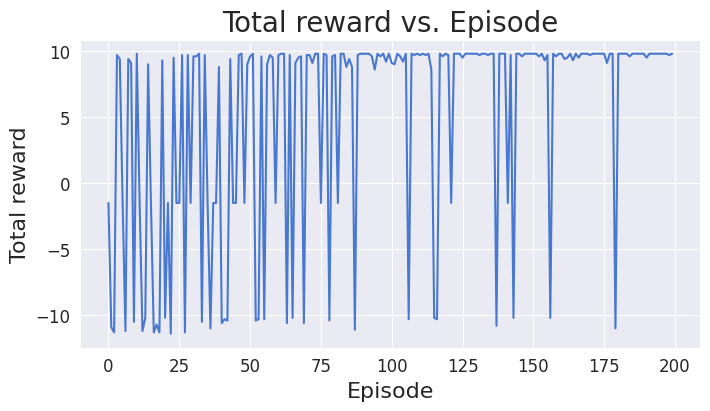

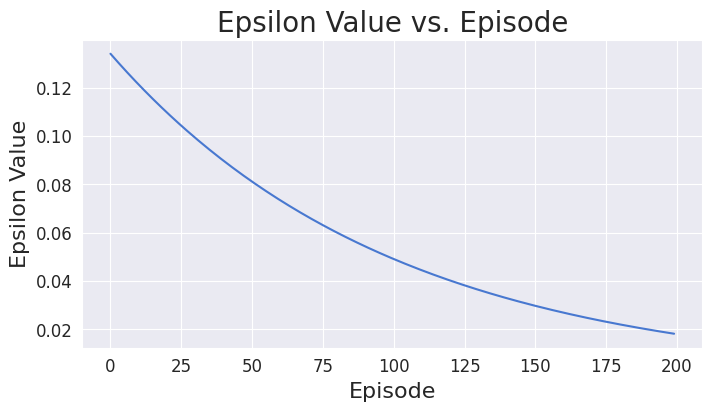

In [ ]:
#Running the SARSA algorithm on the environment and storing the learned Q-values and the total reward received by the agent in each episode.
Q, rewards = sarsa_agent.run()

**Evaluation Phase(choosing only greedy actions)**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Episode: 1, Epsilon Value: 0.9900, Total Reward: -10.7
Episode: 2, Epsilon Value: 0.9801, Total Reward: -1.5000000000000002
Episode: 3, Epsilon Value: 0.9703, Total Reward: -1.5000000000000002
Episode: 4, Epsilon Value: 0.9606, Total Reward: -1.5000000000000002
Episode: 5, Epsilon Value: 0.9510, Total Reward: -10.5
Episode: 6, Epsilon Value: 0.9415, Total Reward: -1.5000000000000002
Episode: 7, Epsilon Value: 0.9321, Total Reward: -1.5000000000000002
Episode: 8, Epsilon Value: 0.9227, Total Reward: -10.5
Episode: 9, Epsilon Value: 0.9135, Total Reward: -10.2
Episode: 10, Epsilon Value: 0.9044, Total Reward: -11.2
Episode: 11, Epsilon Value: 0.8953, Total Reward: -1.5000000000000002
Episode: 12, Epsilon Value: 0.8864, Total Reward: 9.7
Episode: 13, Epsilon Value: 0.8775, Total Reward: -1.5000000000000002
Episode: 14, Epsilon Value: 0.8687, Total Reward: -10.4
Episode: 15, Epsilon Value: 0.8601, Total Reward: -10.4
Episode: 16, Epsilon Value: 0.8515, Total Reward: -10.9
Episode: 17, Epsi

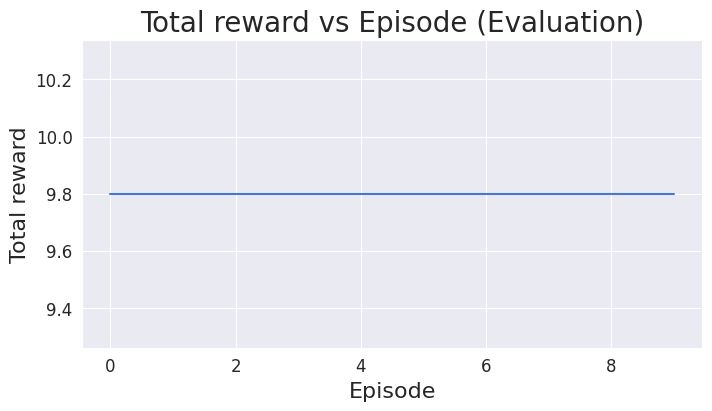

In [ ]:
def evaluate(agent, num_episodes):
    rewards = []
    for episode in range(num_episodes):
        state = agent.env.reset()
        done = False
        reward_total = 0
        while not done:
            action = max(agent.Q[state], key=agent.Q[state].get)
            next_state, reward, done = agent.env.step(action)
            reward_total += reward
            state = next_state
        rewards.append(reward_total)
        print(f"Episode: {episode + 1}, Total Reward: {reward_total}")
    return rewards

sarsa_agent = SARSA(env, num_episodes=1000, max_timesteps=15, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01)
sarsa_agent.train()

evaluation_rewards = evaluate(sarsa_agent, num_episodes=10)

sns.set_style('darkgrid')
sns.set_palette('muted')
plt.figure(figsize=(8, 4))
sns.lineplot(x=range(10), y=evaluation_rewards)
plt.title('Total reward vs Episode (Evaluation)', fontsize=20)
plt.xlabel('Episode', fontsize=16)
plt.ylabel('Total reward', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()


## STEP - 2: HYPER PARAMETERS TUNING

Parameter - 1 - gamma - 0.9

Episode: 1, Epsilon Value: 0.9900, Total Reward: -1.5000000000000002
Episode: 2, Epsilon Value: 0.9801, Total Reward: -10.9
Episode: 3, Epsilon Value: 0.9703, Total Reward: -1.5000000000000002
Episode: 4, Epsilon Value: 0.9606, Total Reward: 8.7
Episode: 5, Epsilon Value: 0.9510, Total Reward: -10.2
Episode: 6, Epsilon Value: 0.9415, Total Reward: -1.5000000000000002
Episode: 7, Epsilon Value: 0.9321, Total Reward: -11.1
Episode: 8, Epsilon Value: 0.9227, Total Reward: -1.5000000000000002
Episode: 9, Epsilon Value: 0.9135, Total Reward: -1.5000000000000002
Episode: 10, Epsilon Value: 0.9044, Total Reward: 8.8
Episode: 11, Epsilon Value: 0.8953, Total Reward: -10.9
Episode: 12, Epsilon Value: 0.8864, Total Reward: -1.5000000000000002
Episode: 13, Epsilon Value: 0.8775, Total Reward: -1.5000000000000002
Episode: 14, Epsilon Value: 0.8687, Total Reward: -11.1
Episode: 15, Epsilon Value: 0.8601, Total Reward: -10.3
Episode: 16, Epsilon Value: 0.8515, Total Reward: -11.2
Episode: 17, Epsilo

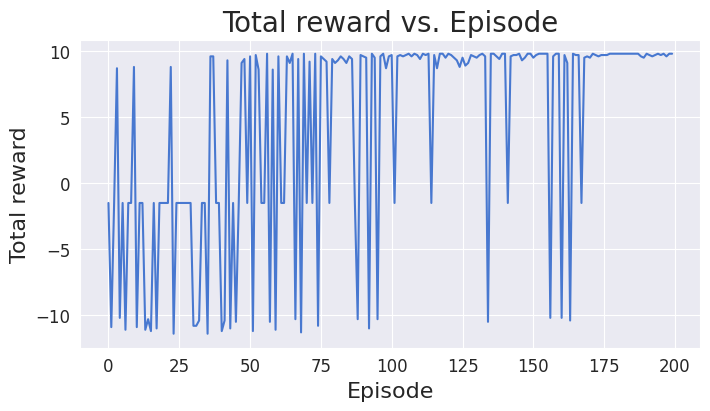

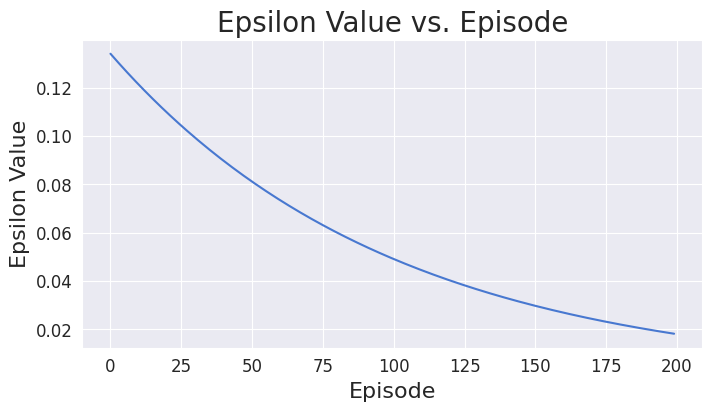

In [ ]:
gamma_1 = 0.9
sarsa_agent_gamma1 = SARSA(env, episodes, timesteps, alpha, gamma_1, epsilon, epsilon_decay, epsilon_min)
Q_G1, rewards_G1 = sarsa_agent_gamma1.run()

Parameter - 1 - gamma - 0.5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Episode: 1, Epsilon Value: 0.9900, Total Reward: -1.5000000000000002
Episode: 2, Epsilon Value: 0.9801, Total Reward: 9.3
Episode: 3, Epsilon Value: 0.9703, Total Reward: -1.5000000000000002
Episode: 4, Epsilon Value: 0.9606, Total Reward: -11.3
Episode: 5, Epsilon Value: 0.9510, Total Reward: -10.5
Episode: 6, Epsilon Value: 0.9415, Total Reward: -1.5000000000000002
Episode: 7, Epsilon Value: 0.9321, Total Reward: -10.8
Episode: 8, Epsilon Value: 0.9227, Total Reward: -10.6
Episode: 9, Epsilon Value: 0.9135, Total Reward: -1.5000000000000002
Episode: 10, Epsilon Value: 0.9044, Total Reward: -1.5000000000000002
Episode: 11, Epsilon Value: 0.8953, Total Reward: 9.6
Episode: 12, Epsilon Value: 0.8864, Total Reward: -1.5000000000000002
Episode: 13, Epsilon Value: 0.8775, Total Reward: 9.1
Episode: 14, Epsilon Value: 0.8687, Total Reward: -1.5000000000000002
Episode: 15, Epsilon Value: 0.8601, Total Reward: -11.0
Episode: 16, Epsilon Value: 0.8515, Total Reward: -10.8
Episode: 17, Epsilon 

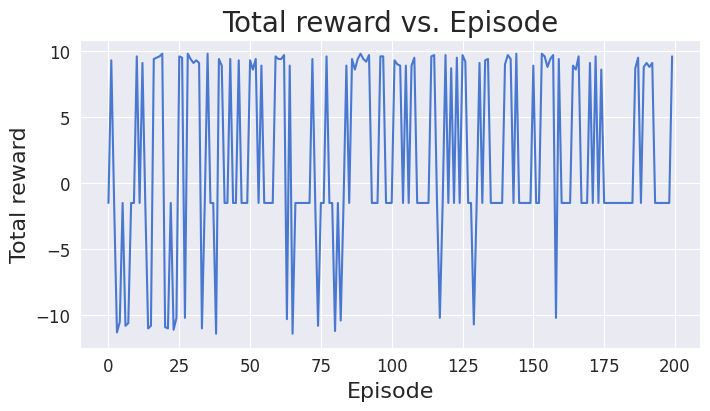

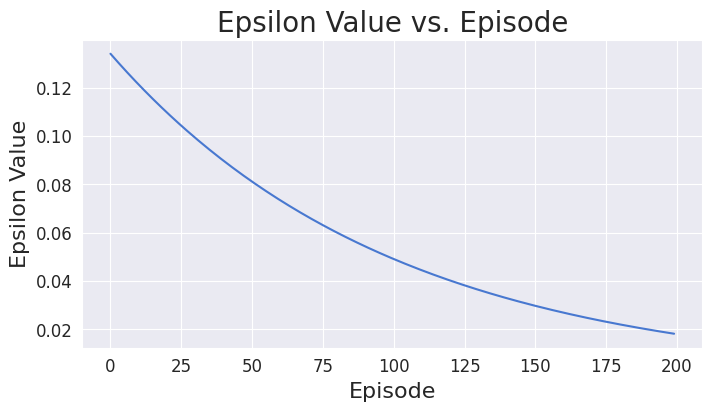

In [ ]:
gamma_2 = 0.5
sarsa_agent_gamma2 = SARSA(env, episodes, timesteps, alpha, gamma_2, epsilon, epsilon_decay, epsilon_min)
Q_G2, rewards_G2 = sarsa_agent_gamma2.run()

Parameter - 1 - gamma - 0.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Episode: 1, Epsilon Value: 0.9900, Total Reward: -1.5000000000000002
Episode: 2, Epsilon Value: 0.9801, Total Reward: -1.5000000000000002
Episode: 3, Epsilon Value: 0.9703, Total Reward: -1.5000000000000002
Episode: 4, Epsilon Value: 0.9606, Total Reward: -1.5000000000000002
Episode: 5, Epsilon Value: 0.9510, Total Reward: -11.2
Episode: 6, Epsilon Value: 0.9415, Total Reward: -1.5000000000000002
Episode: 7, Epsilon Value: 0.9321, Total Reward: -1.5000000000000002
Episode: 8, Epsilon Value: 0.9227, Total Reward: -11.2
Episode: 9, Epsilon Value: 0.9135, Total Reward: -10.7
Episode: 10, Epsilon Value: 0.9044, Total Reward: 9.6
Episode: 11, Epsilon Value: 0.8953, Total Reward: -1.5000000000000002
Episode: 12, Epsilon Value: 0.8864, Total Reward: 9.8
Episode: 13, Epsilon Value: 0.8775, Total Reward: -1.5000000000000002
Episode: 14, Epsilon Value: 0.8687, Total Reward: -10.4
Episode: 15, Epsilon Value: 0.8601, Total Reward: 9.7
Episode: 16, Epsilon Value: 0.8515, Total Reward: 8.6
Episode: 

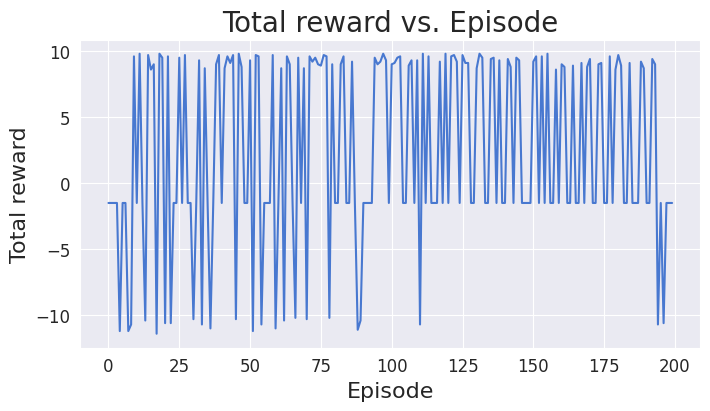

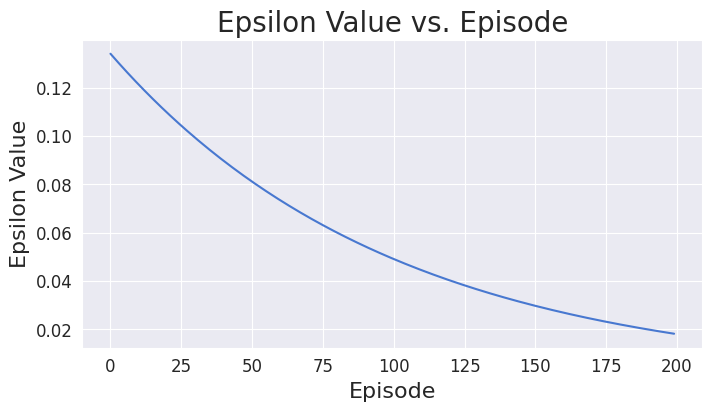

In [ ]:
gamma_3 = 0.1
sarsa_agent_gamma3 = SARSA(env, episodes, timesteps, alpha, gamma_3, epsilon, epsilon_decay, epsilon_min)
Q_G3, rewards_G3 = sarsa_agent_gamma3.run()

Parameter - 2 - epsilon_decays - 0.75

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Episode: 1, Epsilon Value: 0.7500, Total Reward: -1.5000000000000002
Episode: 2, Epsilon Value: 0.5625, Total Reward: -1.5000000000000002
Episode: 3, Epsilon Value: 0.4219, Total Reward: -11.1
Episode: 4, Epsilon Value: 0.3164, Total Reward: -11.0
Episode: 5, Epsilon Value: 0.2373, Total Reward: -10.4
Episode: 6, Epsilon Value: 0.1780, Total Reward: -1.5000000000000002
Episode: 7, Epsilon Value: 0.1335, Total Reward: 9.6
Episode: 8, Epsilon Value: 0.1001, Total Reward: -1.5000000000000002
Episode: 9, Epsilon Value: 0.0751, Total Reward: -1.5000000000000002
Episode: 10, Epsilon Value: 0.0563, Total Reward: -1.5000000000000002
Episode: 11, Epsilon Value: 0.0422, Total Reward: -1.5000000000000002
Episode: 12, Epsilon Value: 0.0317, Total Reward: -1.5000000000000002
Episode: 13, Epsilon Value: 0.0238, Total Reward: 9.0
Episode: 14, Epsilon Value: 0.0178, Total Reward: -1.5000000000000002
Episode: 15, Epsilon Value: 0.0134, Total Reward: 9.3
Episode: 16, Epsilon Value: 0.0100, Total Reward:

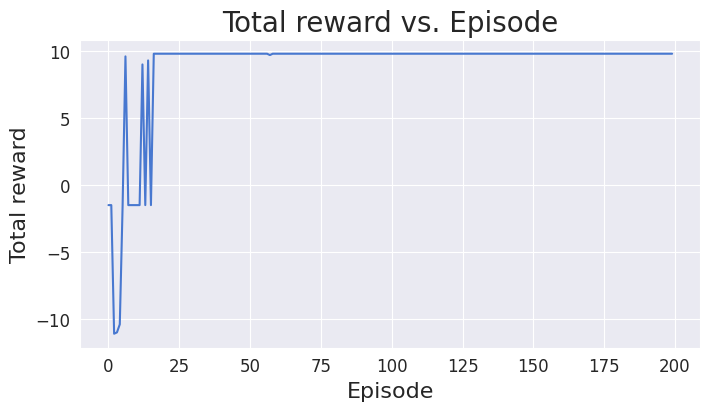

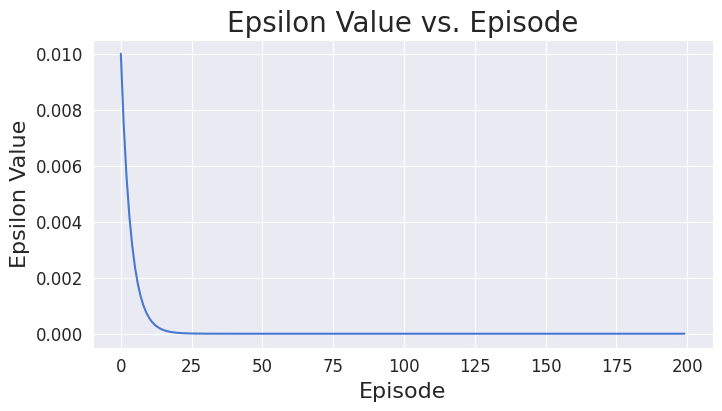

In [ ]:
epsilon_decay_1 = 0.75
sarsa_agent_decay1 = SARSA(env, episodes, timesteps, alpha, gamma, epsilon, epsilon_decay_1, epsilon_min)
Q_D1, rewards_D1 = sarsa_agent_decay1.run()

Parameter - 2 - epsilon_decays - 0.80

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Episode: 1, Epsilon Value: 0.8000, Total Reward: -10.4
Episode: 2, Epsilon Value: 0.6400, Total Reward: -10.7
Episode: 3, Epsilon Value: 0.5120, Total Reward: 9.7
Episode: 4, Epsilon Value: 0.4096, Total Reward: -1.5000000000000002
Episode: 5, Epsilon Value: 0.3277, Total Reward: -10.8
Episode: 6, Epsilon Value: 0.2621, Total Reward: 9.7
Episode: 7, Epsilon Value: 0.2097, Total Reward: -11.0
Episode: 8, Epsilon Value: 0.1678, Total Reward: 8.7
Episode: 9, Epsilon Value: 0.1342, Total Reward: -1.5000000000000002
Episode: 10, Epsilon Value: 0.1074, Total Reward: -1.5000000000000002
Episode: 11, Epsilon Value: 0.0859, Total Reward: 8.8
Episode: 12, Epsilon Value: 0.0687, Total Reward: -1.5000000000000002
Episode: 13, Epsilon Value: 0.0550, Total Reward: 9.8
Episode: 14, Epsilon Value: 0.0440, Total Reward: 9.8
Episode: 15, Epsilon Value: 0.0352, Total Reward: 9.8
Episode: 16, Epsilon Value: 0.0281, Total Reward: 9.8
Episode: 17, Epsilon Value: 0.0225, Total Reward: 9.8
Episode: 18, Epsilo

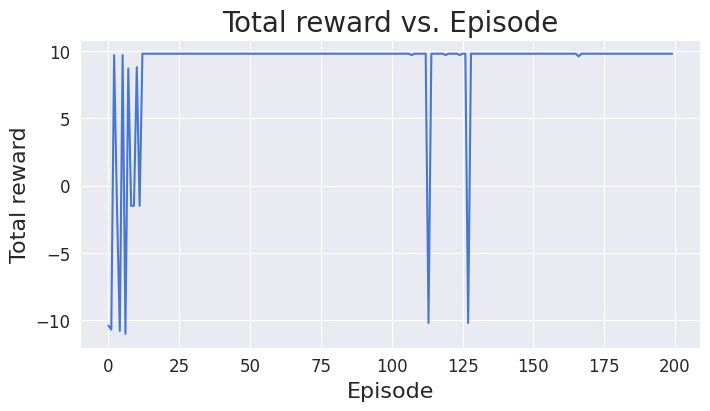

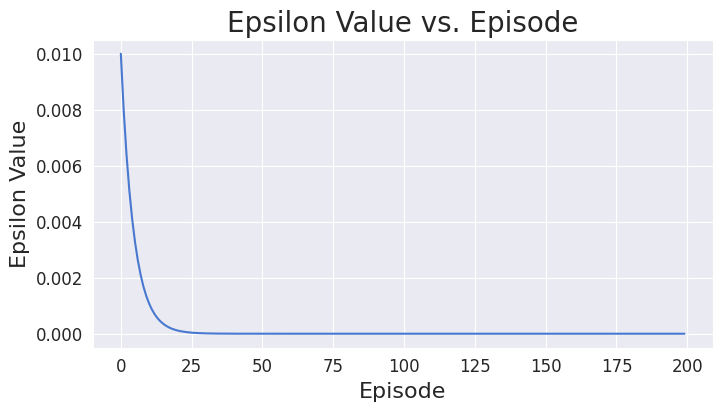

In [ ]:
epsilon_decay_2 = 0.80
sarsa_agent_decay2 = SARSA(env, episodes, timesteps, alpha, gamma, epsilon, epsilon_decay_2, epsilon_min)
Q_D2, rewards_D2 = sarsa_agent_decay2.run()

Parameter - 2 - epsilon_decays - 0.85

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Episode: 1, Epsilon Value: 0.8500, Total Reward: -10.5
Episode: 2, Epsilon Value: 0.7225, Total Reward: -11.3
Episode: 3, Epsilon Value: 0.6141, Total Reward: -1.5000000000000002
Episode: 4, Epsilon Value: 0.5220, Total Reward: -1.5000000000000002
Episode: 5, Epsilon Value: 0.4437, Total Reward: 9.6
Episode: 6, Epsilon Value: 0.3771, Total Reward: -1.5000000000000002
Episode: 7, Epsilon Value: 0.3206, Total Reward: -10.4
Episode: 8, Epsilon Value: 0.2725, Total Reward: 9.3
Episode: 9, Epsilon Value: 0.2316, Total Reward: -11.1
Episode: 10, Epsilon Value: 0.1969, Total Reward: 9.7
Episode: 11, Epsilon Value: 0.1673, Total Reward: 9.8
Episode: 12, Epsilon Value: 0.1422, Total Reward: 9.8
Episode: 13, Epsilon Value: 0.1209, Total Reward: 9.6
Episode: 14, Epsilon Value: 0.1028, Total Reward: 9.8
Episode: 15, Epsilon Value: 0.0874, Total Reward: 9.8
Episode: 16, Epsilon Value: 0.0743, Total Reward: 9.8
Episode: 17, Epsilon Value: 0.0631, Total Reward: 9.5
Episode: 18, Epsilon Value: 0.0536,

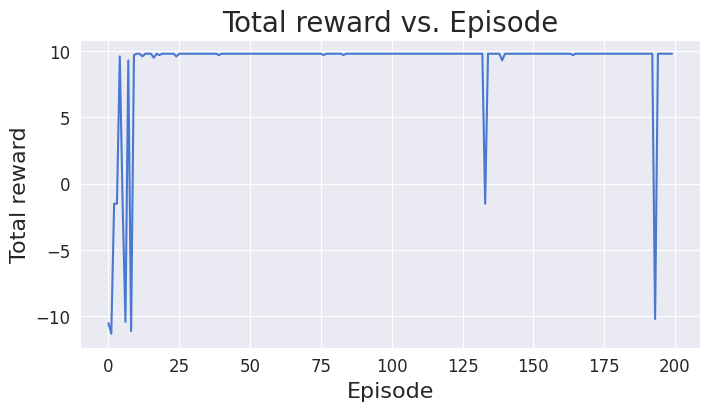

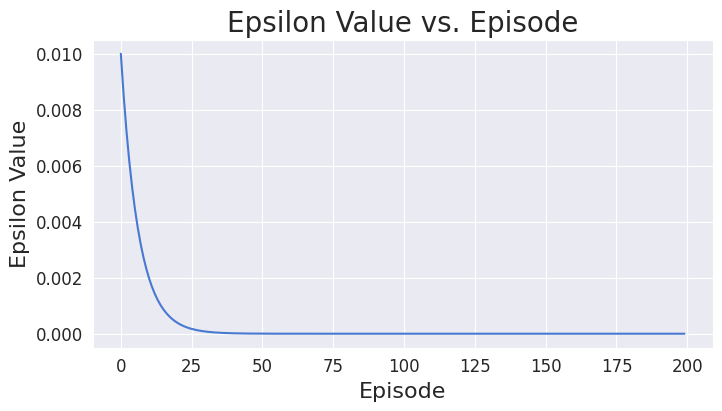

In [ ]:
epsilon_decay_3 = 0.85
sarsa_agent_decay3 = SARSA(env, episodes, timesteps, alpha, gamma, epsilon, epsilon_decay_3, epsilon_min)
Q_D3, rewards_D3 = sarsa_agent_decay3.run()

**Hyperparameter combination graphs**



chosen two hyperparameters with 3 different values will produce a combination of 9 graphs.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Episode: 1, Epsilon Value: 0.7500, Total Reward: -10.9
Episode: 2, Epsilon Value: 0.5625, Total Reward: 9.6
Episode: 3, Epsilon Value: 0.4219, Total Reward: -11.1
Episode: 4, Epsilon Value: 0.3164, Total Reward: 9.2
Episode: 5, Epsilon Value: 0.2373, Total Reward: 9.8
Episode: 6, Epsilon Value: 0.1780, Total Reward: -1.5000000000000002
Episode: 7, Epsilon Value: 0.1335, Total Reward: 9.8
Episode: 8, Epsilon Value: 0.1001, Total Reward: 9.7
Episode: 9, Epsilon Value: 0.0751, Total Reward: 9.8
Episode: 10, Epsilon Value: 0.0563, Total Reward: 9.8
Episode: 11, Epsilon Value: 0.0422, Total Reward: 9.8
Episode: 12, Epsilon Value: 0.0317, Total Reward: 9.8
Episode: 13, Epsilon Value: 0.0238, Total Reward: 9.8
Episode: 14, Epsilon Value: 0.0178, Total Reward: 9.8
Episode: 15, Epsilon Value: 0.0134, Total Reward: 9.8
Episode: 16, Epsilon Value: 0.0100, Total Reward: 9.8
Episode: 17, Epsilon Value: 0.0100, Total Reward: 9.8
Episode: 18, Epsilon Value: 0.0100, Total Reward: 9.8
Episode: 19, Epsi

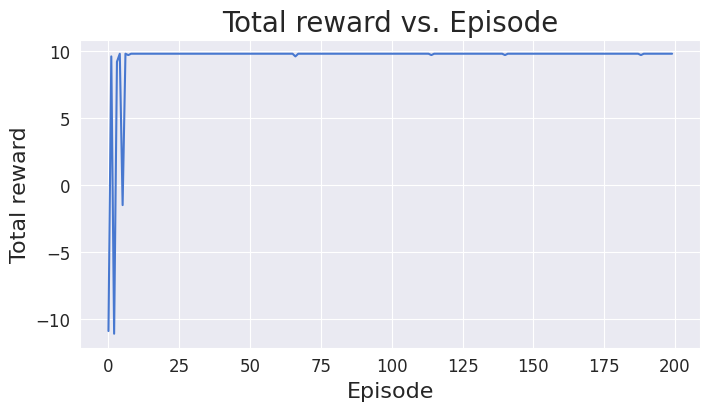

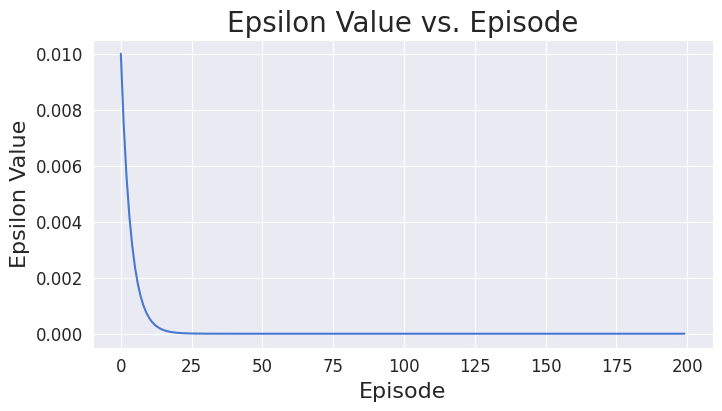

gamma: 0.90 - Epsilon Decay: 0.75 - Reward: 1905.70
Episode: 1, Epsilon Value: 0.8000, Total Reward: -1.5000000000000002
Episode: 2, Epsilon Value: 0.6400, Total Reward: -1.5000000000000002
Episode: 3, Epsilon Value: 0.5120, Total Reward: -10.5
Episode: 4, Epsilon Value: 0.4096, Total Reward: -11.1
Episode: 5, Epsilon Value: 0.3277, Total Reward: -1.5000000000000002
Episode: 6, Epsilon Value: 0.2621, Total Reward: -11.1
Episode: 7, Epsilon Value: 0.2097, Total Reward: -1.5000000000000002
Episode: 8, Epsilon Value: 0.1678, Total Reward: -1.5000000000000002
Episode: 9, Epsilon Value: 0.1342, Total Reward: -1.5000000000000002
Episode: 10, Epsilon Value: 0.1074, Total Reward: -1.5000000000000002
Episode: 11, Epsilon Value: 0.0859, Total Reward: -1.5000000000000002
Episode: 12, Epsilon Value: 0.0687, Total Reward: -1.5000000000000002
Episode: 13, Epsilon Value: 0.0550, Total Reward: -1.5000000000000002
Episode: 14, Epsilon Value: 0.0440, Total Reward: 8.7
Episode: 15, Epsilon Value: 0.0352,

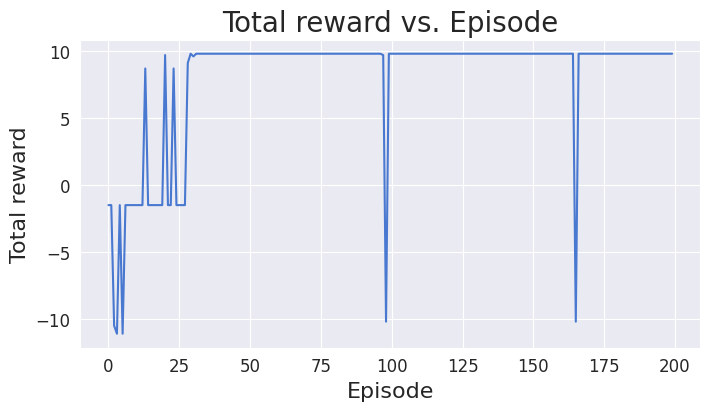

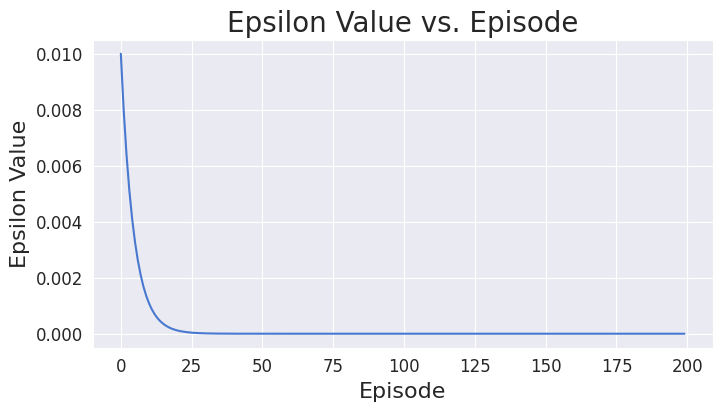

gamma: 0.90 - Epsilon Decay: 0.80 - Reward: 1606.00
Episode: 1, Epsilon Value: 0.8500, Total Reward: 9.6
Episode: 2, Epsilon Value: 0.7225, Total Reward: -1.5000000000000002
Episode: 3, Epsilon Value: 0.6141, Total Reward: -1.5000000000000002
Episode: 4, Epsilon Value: 0.5220, Total Reward: -10.3
Episode: 5, Epsilon Value: 0.4437, Total Reward: 9.7
Episode: 6, Epsilon Value: 0.3771, Total Reward: 9.0
Episode: 7, Epsilon Value: 0.3206, Total Reward: -10.2
Episode: 8, Epsilon Value: 0.2725, Total Reward: 9.2
Episode: 9, Epsilon Value: 0.2316, Total Reward: 9.8
Episode: 10, Epsilon Value: 0.1969, Total Reward: 9.2
Episode: 11, Epsilon Value: 0.1673, Total Reward: 9.8
Episode: 12, Epsilon Value: 0.1422, Total Reward: 9.8
Episode: 13, Epsilon Value: 0.1209, Total Reward: 9.7
Episode: 14, Epsilon Value: 0.1028, Total Reward: 9.8
Episode: 15, Epsilon Value: 0.0874, Total Reward: 9.8
Episode: 16, Epsilon Value: 0.0743, Total Reward: 9.8
Episode: 17, Epsilon Value: 0.0631, Total Reward: 9.8
Epi

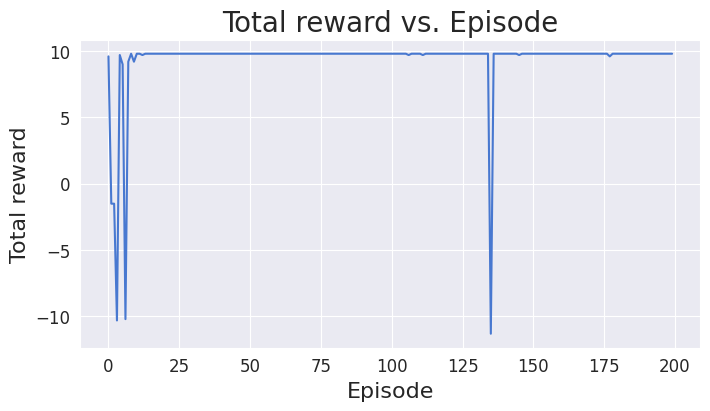

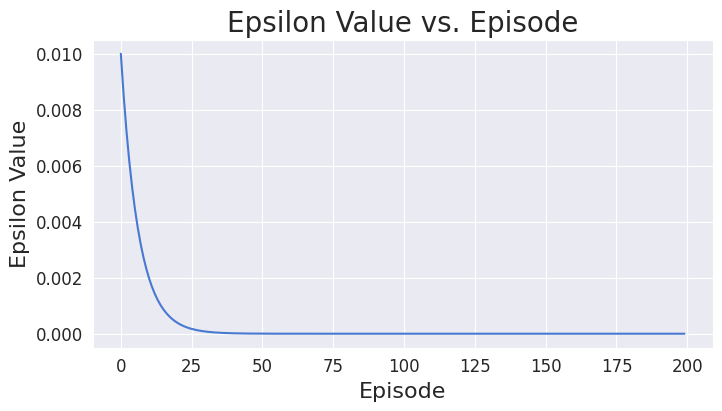

gamma: 0.90 - Epsilon Decay: 0.85 - Reward: 1873.30
Episode: 1, Epsilon Value: 0.7500, Total Reward: -1.5000000000000002
Episode: 2, Epsilon Value: 0.5625, Total Reward: -10.2
Episode: 3, Epsilon Value: 0.4219, Total Reward: -1.5000000000000002
Episode: 4, Epsilon Value: 0.3164, Total Reward: 9.8
Episode: 5, Epsilon Value: 0.2373, Total Reward: 9.4
Episode: 6, Epsilon Value: 0.1780, Total Reward: 9.3
Episode: 7, Epsilon Value: 0.1335, Total Reward: 9.7
Episode: 8, Epsilon Value: 0.1001, Total Reward: 9.8
Episode: 9, Epsilon Value: 0.0751, Total Reward: 9.8
Episode: 10, Epsilon Value: 0.0563, Total Reward: 9.8
Episode: 11, Epsilon Value: 0.0422, Total Reward: 9.8
Episode: 12, Epsilon Value: 0.0317, Total Reward: 9.8
Episode: 13, Epsilon Value: 0.0238, Total Reward: 9.8
Episode: 14, Epsilon Value: 0.0178, Total Reward: 9.8
Episode: 15, Epsilon Value: 0.0134, Total Reward: 9.8
Episode: 16, Epsilon Value: 0.0100, Total Reward: 9.8
Episode: 17, Epsilon Value: 0.0100, Total Reward: 9.8
Episo

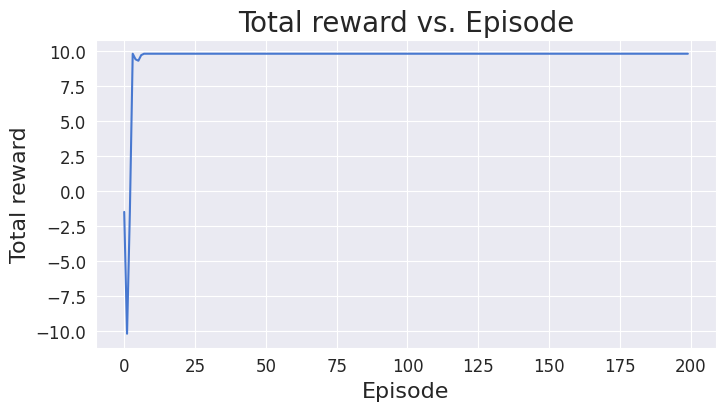

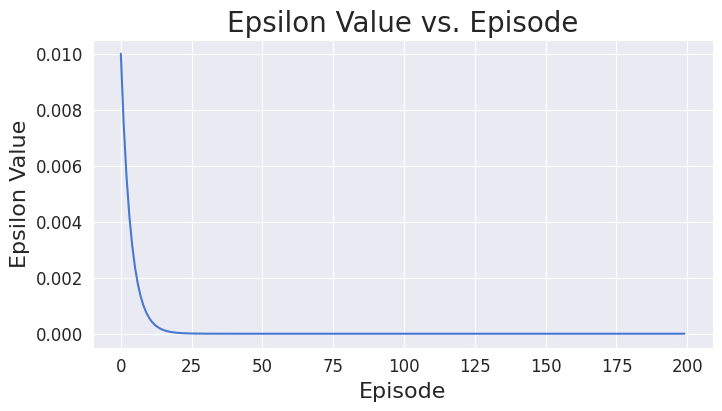

gamma: 0.50 - Epsilon Decay: 0.75 - Reward: 1916.40
Episode: 1, Epsilon Value: 0.8000, Total Reward: -1.5000000000000002
Episode: 2, Epsilon Value: 0.6400, Total Reward: -10.2
Episode: 3, Epsilon Value: 0.5120, Total Reward: -11.1
Episode: 4, Epsilon Value: 0.4096, Total Reward: -10.2
Episode: 5, Epsilon Value: 0.3277, Total Reward: -11.0
Episode: 6, Epsilon Value: 0.2621, Total Reward: -1.5000000000000002
Episode: 7, Epsilon Value: 0.2097, Total Reward: 9.8
Episode: 8, Epsilon Value: 0.1678, Total Reward: -1.5000000000000002
Episode: 9, Epsilon Value: 0.1342, Total Reward: 9.2
Episode: 10, Epsilon Value: 0.1074, Total Reward: -1.5000000000000002
Episode: 11, Epsilon Value: 0.0859, Total Reward: 8.8
Episode: 12, Epsilon Value: 0.0687, Total Reward: -1.5000000000000002
Episode: 13, Epsilon Value: 0.0550, Total Reward: 9.8
Episode: 14, Epsilon Value: 0.0440, Total Reward: 9.7
Episode: 15, Epsilon Value: 0.0352, Total Reward: 9.8
Episode: 16, Epsilon Value: 0.0281, Total Reward: 9.8
Episo

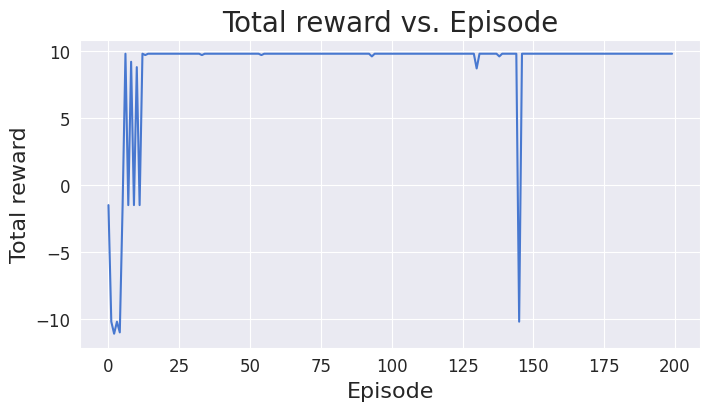

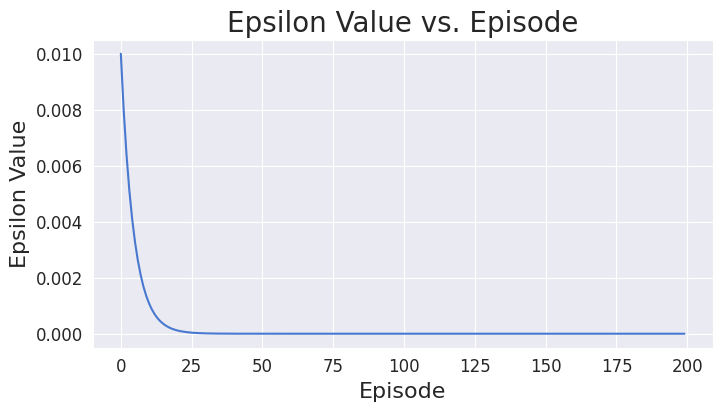

gamma: 0.50 - Epsilon Decay: 0.80 - Reward: 1798.40
Episode: 1, Epsilon Value: 0.8500, Total Reward: -10.6
Episode: 2, Epsilon Value: 0.7225, Total Reward: -11.4
Episode: 3, Epsilon Value: 0.6141, Total Reward: 9.8
Episode: 4, Epsilon Value: 0.5220, Total Reward: 9.6
Episode: 5, Epsilon Value: 0.4437, Total Reward: -1.5000000000000002
Episode: 6, Epsilon Value: 0.3771, Total Reward: -1.5000000000000002
Episode: 7, Epsilon Value: 0.3206, Total Reward: -1.5000000000000002
Episode: 8, Epsilon Value: 0.2725, Total Reward: -10.6
Episode: 9, Epsilon Value: 0.2316, Total Reward: -1.5000000000000002
Episode: 10, Epsilon Value: 0.1969, Total Reward: -1.5000000000000002
Episode: 11, Epsilon Value: 0.1673, Total Reward: 9.5
Episode: 12, Epsilon Value: 0.1422, Total Reward: 9.8
Episode: 13, Epsilon Value: 0.1209, Total Reward: 8.9
Episode: 14, Epsilon Value: 0.1028, Total Reward: 9.1
Episode: 15, Epsilon Value: 0.0874, Total Reward: 9.8
Episode: 16, Epsilon Value: 0.0743, Total Reward: 9.8
Episode

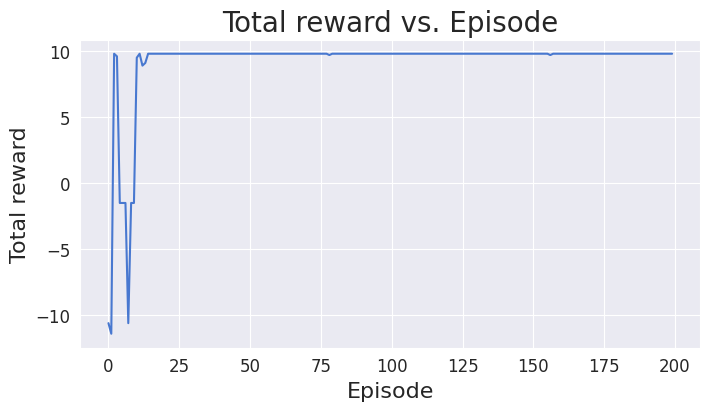

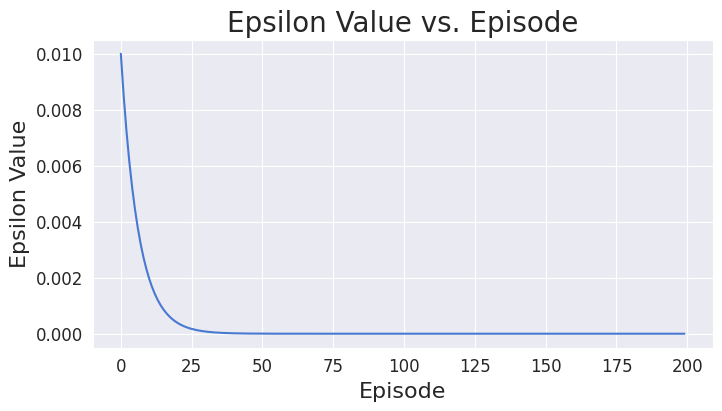

gamma: 0.50 - Epsilon Decay: 0.85 - Reward: 1839.20
Episode: 1, Epsilon Value: 0.7500, Total Reward: 9.7
Episode: 2, Epsilon Value: 0.5625, Total Reward: -1.5000000000000002
Episode: 3, Epsilon Value: 0.4219, Total Reward: 9.1
Episode: 4, Epsilon Value: 0.3164, Total Reward: 9.7
Episode: 5, Epsilon Value: 0.2373, Total Reward: -10.5
Episode: 6, Epsilon Value: 0.1780, Total Reward: 9.8
Episode: 7, Epsilon Value: 0.1335, Total Reward: -1.5000000000000002
Episode: 8, Epsilon Value: 0.1001, Total Reward: -1.5000000000000002
Episode: 9, Epsilon Value: 0.0751, Total Reward: 9.3
Episode: 10, Epsilon Value: 0.0563, Total Reward: -10.4
Episode: 11, Epsilon Value: 0.0422, Total Reward: -10.5
Episode: 12, Epsilon Value: 0.0317, Total Reward: 9.8
Episode: 13, Epsilon Value: 0.0238, Total Reward: 9.8
Episode: 14, Epsilon Value: 0.0178, Total Reward: 9.8
Episode: 15, Epsilon Value: 0.0134, Total Reward: 9.8
Episode: 16, Epsilon Value: 0.0100, Total Reward: 9.8
Episode: 17, Epsilon Value: 0.0100, Tot

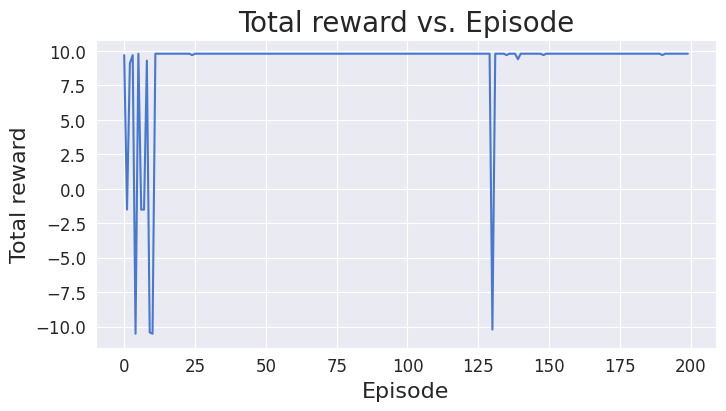

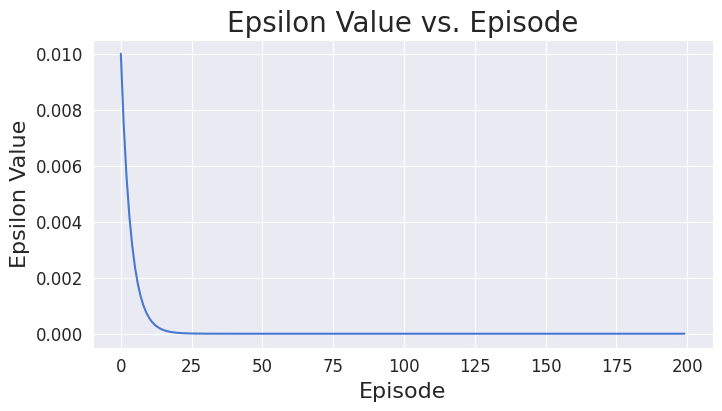

gamma: 0.10 - Epsilon Decay: 0.75 - Reward: 1843.10
Episode: 1, Epsilon Value: 0.8000, Total Reward: -10.6
Episode: 2, Epsilon Value: 0.6400, Total Reward: -10.4
Episode: 3, Epsilon Value: 0.5120, Total Reward: -10.9
Episode: 4, Epsilon Value: 0.4096, Total Reward: -10.7
Episode: 5, Epsilon Value: 0.3277, Total Reward: -1.5000000000000002
Episode: 6, Epsilon Value: 0.2621, Total Reward: 9.5
Episode: 7, Epsilon Value: 0.2097, Total Reward: -1.5000000000000002
Episode: 8, Epsilon Value: 0.1678, Total Reward: -11.0
Episode: 9, Epsilon Value: 0.1342, Total Reward: 8.7
Episode: 10, Epsilon Value: 0.1074, Total Reward: 9.0
Episode: 11, Epsilon Value: 0.0859, Total Reward: 9.8
Episode: 12, Epsilon Value: 0.0687, Total Reward: 9.3
Episode: 13, Epsilon Value: 0.0550, Total Reward: 9.8
Episode: 14, Epsilon Value: 0.0440, Total Reward: 9.7
Episode: 15, Epsilon Value: 0.0352, Total Reward: 9.8
Episode: 16, Epsilon Value: 0.0281, Total Reward: 9.8
Episode: 17, Epsilon Value: 0.0225, Total Reward: 9

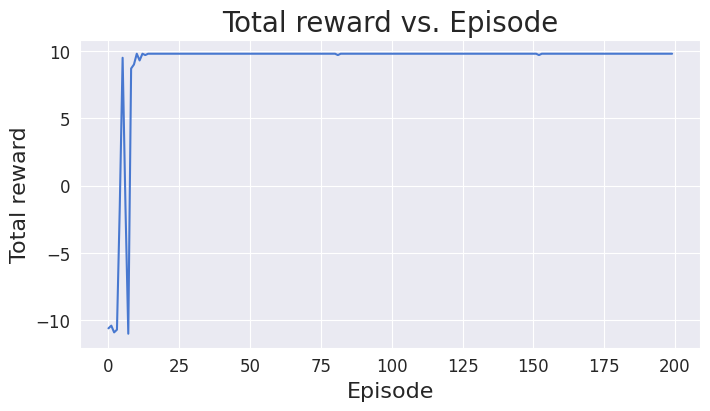

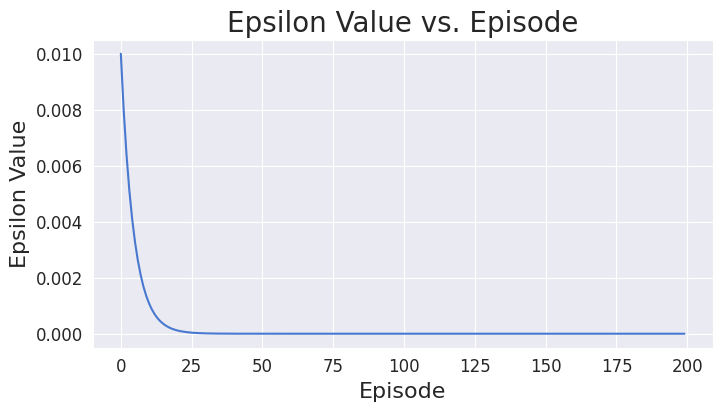

gamma: 0.10 - Epsilon Decay: 0.80 - Reward: 1831.80
Episode: 1, Epsilon Value: 0.8500, Total Reward: -1.5000000000000002
Episode: 2, Epsilon Value: 0.7225, Total Reward: -1.5000000000000002
Episode: 3, Epsilon Value: 0.6141, Total Reward: 9.7
Episode: 4, Epsilon Value: 0.5220, Total Reward: -11.3
Episode: 5, Epsilon Value: 0.4437, Total Reward: 8.9
Episode: 6, Epsilon Value: 0.3771, Total Reward: -1.5000000000000002
Episode: 7, Epsilon Value: 0.3206, Total Reward: 9.8
Episode: 8, Epsilon Value: 0.2725, Total Reward: 9.0
Episode: 9, Epsilon Value: 0.2316, Total Reward: -10.5
Episode: 10, Epsilon Value: 0.1969, Total Reward: 9.8
Episode: 11, Epsilon Value: 0.1673, Total Reward: 9.7
Episode: 12, Epsilon Value: 0.1422, Total Reward: -10.4
Episode: 13, Epsilon Value: 0.1209, Total Reward: 9.7
Episode: 14, Epsilon Value: 0.1028, Total Reward: 9.6
Episode: 15, Epsilon Value: 0.0874, Total Reward: 9.8
Episode: 16, Epsilon Value: 0.0743, Total Reward: 9.8
Episode: 17, Epsilon Value: 0.0631, Tot

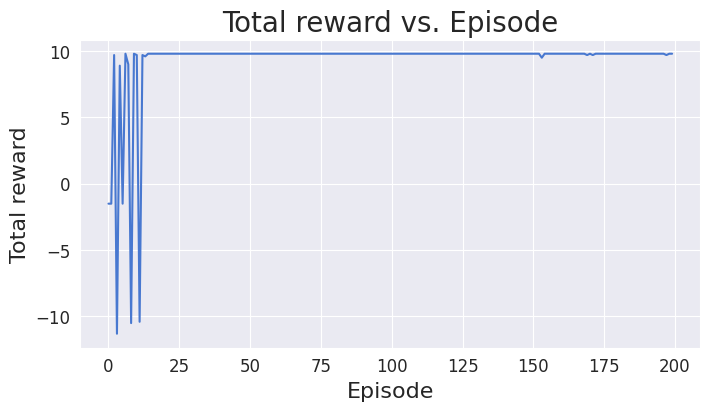

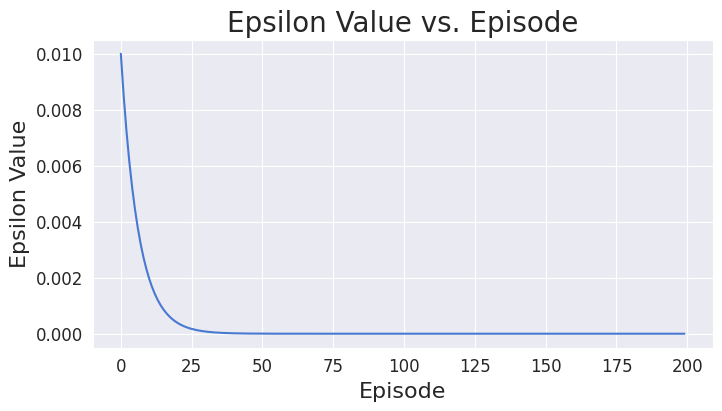

gamma: 0.10 - Epsilon Decay: 0.85 - Reward: 1861.70


In [ ]:
#Defining the hyperparameters to be tested
gamma_values = [0.9, 0.5, 0.1]
epsilon_decay_values = [0.75, 0.80, 0.85]

#ing the best parameters and reward to be returned at the end
best_reward = float('-inf')
best_parameter = {}

#Looping over all the hyperparameters to train the agent
for gamma in gamma_values:
    for epsilon_decay in epsilon_decay_values:
        agent = SARSA(env, episodes, timesteps, alpha, gamma, epsilon, epsilon_decay, epsilon_min)
        Q, rewards = agent.run()
        aggregated_reward = sum(rewards)
        
        #Checking if the current hyperparameters give the best reward so far
        if aggregated_reward > best_reward:
            best_reward = aggregated_reward
            best_agent = agent
            best_parameter = {'gamma': gamma, 'epsilon_decay': epsilon_decay}
            
        #Printing the results for the current hyperparameters
        print(f"gamma: {gamma:.2f} - Epsilon Decay: {epsilon_decay:.2f} - Reward: {aggregated_reward:.2f}")

**Diplaying the best parameters after hyperparameter tuning and plotting the reward graph**


Best Parameters: gamma=0.50, epsilon_decay=0.75, reward=1916.40


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


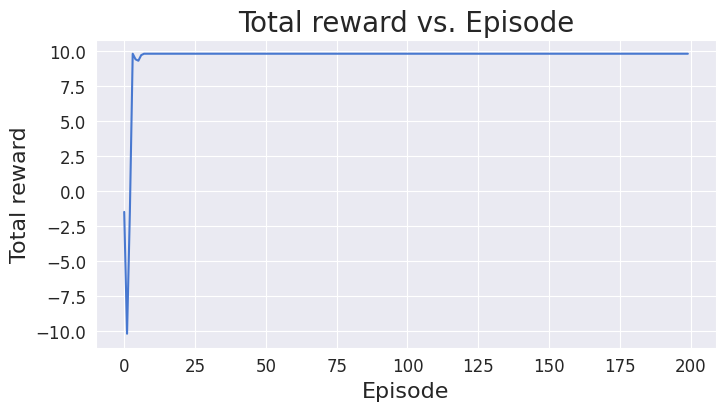

In [ ]:
#Printing the best parameters and it's reward
print(f"\nBest Parameters: gamma={best_parameter['gamma']:.2f}, epsilon_decay={best_parameter['epsilon_decay']:.2f}, reward={best_reward:.2f}")
#Plotting the rewards obtained during training with the best agent
best_agent.plot_rewards()

# PART - 3 : SOLVING ENVIRONMENT USING Q-LEARNING

## STEP - 1: DEFINING Q-LEARNING ALGORITHM FOR THE ENVIRONMENT

In [ ]:
class QLearning:
  
    def __init__(self, env, num_episodes, max_timesteps, alpha, gamma, epsilon, epsilon_decay, epsilon_min):
        # Initializing the Q-learning agent with the environment and hyperparameters.
        # Creating a Q-table to store the action-values for each state-action pair in the environment.
        self.env = env
        self.num_episodes = num_episodes
        self.max_timesteps = max_timesteps
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.Q = np.zeros((env.observation_space.n, env.action_space.n))
        self.rewards = []
        self.epsilon_vals = []

    # Choosing an action for the given state either by exploiting the Q-value or by exploring randomly.
    def exploratory_action(self, state):
        if np.random.rand() < self.epsilon:
            # Choosing a random action
            return self.env.action_space.sample()
        else:
            # Choosing the action with the highest Q-value for the current state
            return np.argmax(self.Q[state])

    # Updating the Q-value for the given state-action pair
    def q_update(self, state, action, reward, next_state):
      next_state_action = self.Q[state][action]
      td_reward = reward + self.gamma*np.max(self.Q[next_state])
      self.Q[state][action] = next_state_action + self.alpha*(td_reward - next_state_action)

    # Defining a function to run episodes of the algorithm
    def run_episode(self, episode):
        # Resetting the environment
        state = self.env.reset()
        done = False
        reward_total = 0
        t = 0
        # Running the episode until it's done or the maximum number of timesteps is reached
        while not done and t < self.max_timesteps:
            action = self.exploratory_action(state)
            next_state, reward, done = self.env.step(action)
            reward_total += reward
            t += 1
            # Updating Q-values for the current state-action pair
            self.q_update(state, action, reward, next_state)
            state = next_state
        # Updating the epsilon and appending the total reward to the list of rewards
        self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
        self.rewards.append(reward_total)
        # Printing the episode number, epsilon value, and Total reward obtained in the episode
        print(f"Current episode: {episode + 1}, Epsilon Value: {self.epsilon:.4f}, Total Reward: {reward_total}")

    # Training the agent by running multiple episodes
    def train(self):
        episode = 0
        while episode < self.num_episodes:
            self.run_episode(episode)
            episode += 1

    def plot_rewards(self):
      sns.set_style('darkgrid')
      sns.set_palette('muted')
      plt.figure(figsize=(8, 4))
      sns.lineplot(x=range(self.num_episodes), y = self.rewards)
      plt.title('Total reward vs. Episode', fontsize=20)
      plt.xlabel('Episode', fontsize=16)
      plt.ylabel('Total reward', fontsize=16)
      plt.tick_params(axis='both', which='major', labelsize=12)
      plt.show()

    def plot_epsilon(self):
        sns.set_style('darkgrid')
        sns.set_palette('muted')
        plt.figure(figsize=(8, 4))
        epsilons = [self.epsilon * self.epsilon_decay**i for i in range(self.num_episodes)]
        sns.lineplot(x=range(self.num_episodes), y=epsilons)
        plt.title('Epsilon Value vs. Episode', fontsize=20)
        plt.xlabel('Episode', fontsize=16)
        plt.ylabel('Epsilon Value', fontsize=16)
        plt.tick_params(axis='both', which='major', labelsize=12)
        plt.show()

    def run(self):
        self.train()
        self.plot_rewards()
        self.plot_epsilon()
        return self.Q, self.rewards


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Setting up a Q-Learning agent to interact with an environment**

In [ ]:
episodes = 200
timesteps = 15
alpha = 0.1
gamma = 0.99
epsilon = 1.0
epsilon_decay = 0.99
epsilon_min = 0.01
q_learning_agent = QLearning(env, episodes, timesteps, alpha, gamma, epsilon, epsilon_decay, epsilon_min)

Current episode: 1, Epsilon Value: 0.9900, Total Reward: -10.2
Current episode: 2, Epsilon Value: 0.9801, Total Reward: -10.3
Current episode: 3, Epsilon Value: 0.9703, Total Reward: -10.7
Current episode: 4, Epsilon Value: 0.9606, Total Reward: -10.4
Current episode: 5, Epsilon Value: 0.9510, Total Reward: -11.2
Current episode: 6, Epsilon Value: 0.9415, Total Reward: -10.9
Current episode: 7, Epsilon Value: 0.9321, Total Reward: -1.5000000000000002
Current episode: 8, Epsilon Value: 0.9227, Total Reward: -1.5000000000000002
Current episode: 9, Epsilon Value: 0.9135, Total Reward: -1.5000000000000002
Current episode: 10, Epsilon Value: 0.9044, Total Reward: -11.1
Current episode: 11, Epsilon Value: 0.8953, Total Reward: -1.5000000000000002
Current episode: 12, Epsilon Value: 0.8864, Total Reward: -10.4
Current episode: 13, Epsilon Value: 0.8775, Total Reward: 9.8
Current episode: 14, Epsilon Value: 0.8687, Total Reward: 8.9
Current episode: 15, Epsilon Value: 0.8601, Total Reward: -10

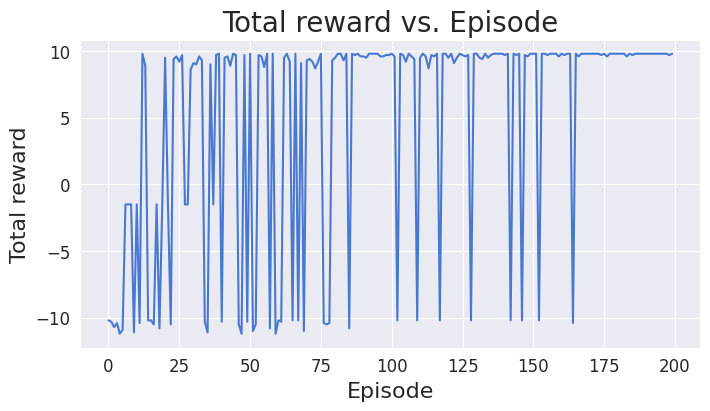

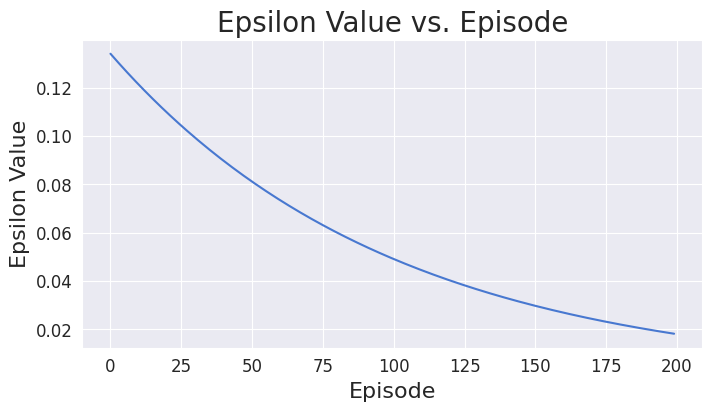

In [ ]:
#Running the QLearning algorithm on the environment and storing the learned Q-values and the total reward received by the agent in each episode.
Q, rewards = q_learning_agent.run()

We can observe that there are ups and downs in the Total reward as the episodes were increasing, but in the last 10 episodes we can see proper increase of the cummulative reward and the maximum reward was observed in the final 100th episode is 9.8.

**Evaluating the QLearning (choosing only greedy)**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Episode: 1, Total Reward: 9.8
Episode: 2, Total Reward: 9.8
Episode: 3, Total Reward: 9.8
Episode: 4, Total Reward: 9.8
Episode: 5, Total Reward: 9.8
Episode: 6, Total Reward: 9.8
Episode: 7, Total Reward: 9.8
Episode: 8, Total Reward: 9.8
Episode: 9, Total Reward: 9.8
Episode: 10, Total Reward: 9.8


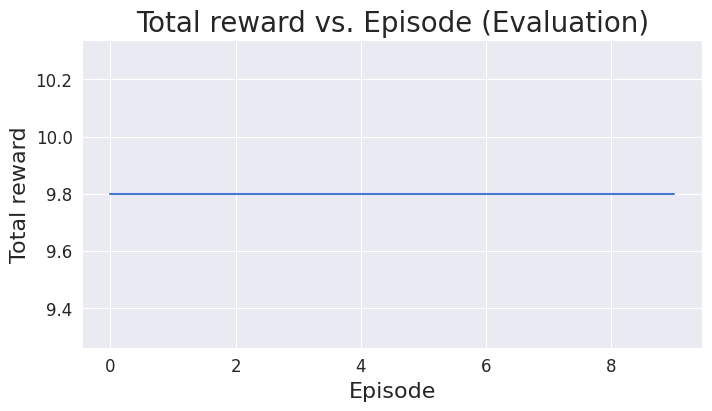

In [ ]:
def evaluate(agent, num_episodes):
    rewards = []
    for episode in range(num_episodes):
        state = agent.env.reset()
        done = False
        reward_total = 0
        t = 0
        while not done and t < agent.max_timesteps:
            action = np.argmax(agent.Q[state])
            next_state, reward, done = agent.env.step(action)
            reward_total += reward
            t += 1
            state = next_state
        rewards.append(reward_total)
        print(f"Episode: {episode + 1}, Total Reward: {reward_total}")
    return rewards


evaluation_rewards = evaluate(q_learning_agent, num_episodes=10)

sns.set_style('darkgrid')
sns.set_palette('muted')
plt.figure(figsize=(8, 4))
sns.lineplot(x=range(10), y=evaluation_rewards)
plt.title('Total reward vs. Episode (Evaluation)', fontsize=20)
plt.xlabel('Episode', fontsize=16)
plt.ylabel('Total reward', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

## STEP - 2: HYPER PARAMETERS TUNING

Parameter - 1 - gamma - 0.9

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Current episode: 1, Epsilon Value: 0.9900, Total Reward: -11.3
Current episode: 2, Epsilon Value: 0.9801, Total Reward: -10.2
Current episode: 3, Epsilon Value: 0.9703, Total Reward: -1.5000000000000002
Current episode: 4, Epsilon Value: 0.9606, Total Reward: -10.4
Current episode: 5, Epsilon Value: 0.9510, Total Reward: 9.5
Current episode: 6, Epsilon Value: 0.9415, Total Reward: -10.7
Current episode: 7, Epsilon Value: 0.9321, Total Reward: -1.5000000000000002
Current episode: 8, Epsilon Value: 0.9227, Total Reward: 9.7
Current episode: 9, Epsilon Value: 0.9135, Total Reward: -10.4
Current episode: 10, Epsilon Value: 0.9044, Total Reward: -1.5000000000000002
Current episode: 11, Epsilon Value: 0.8953, Total Reward: -1.5000000000000002
Current episode: 12, Epsilon Value: 0.8864, Total Reward: -10.5
Current episode: 13, Epsilon Value: 0.8775, Total Reward: -10.4
Current episode: 14, Epsilon Value: 0.8687, Total Reward: 9.7
Current episode: 15, Epsilon Value: 0.8601, Total Reward: -11.3

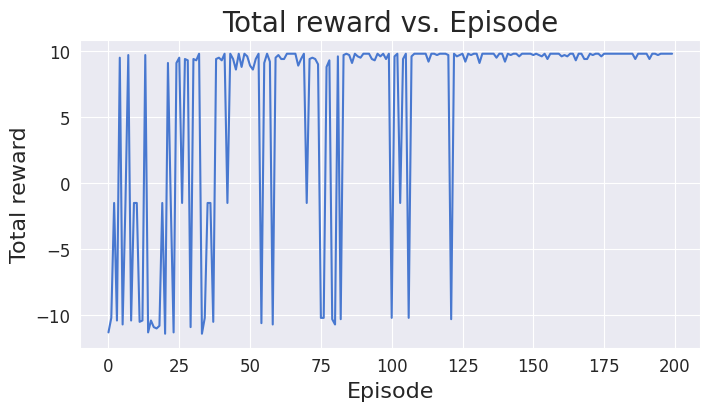

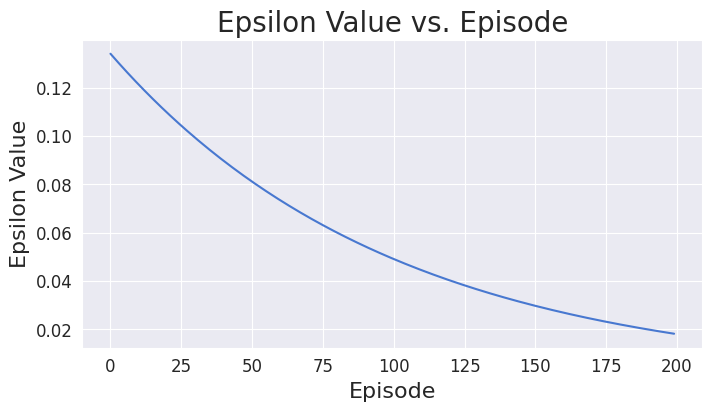

In [ ]:
gamma_1 = 0.9
q_learning_agent1 = QLearning(env, episodes, timesteps, alpha, gamma_1, epsilon, epsilon_decay, epsilon_min)
Q_G1, rewards_G1 = q_learning_agent1.run()

As we have decreased the gamma value from 0.99 to 0.9, the final reward value can be observed as 9.7, which is a very minute difference as compared to the original agent.

Parameter - 1 - gamma - 0.8

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Current episode: 1, Epsilon Value: 0.9900, Total Reward: -10.2
Current episode: 2, Epsilon Value: 0.9801, Total Reward: -1.5000000000000002
Current episode: 3, Epsilon Value: 0.9703, Total Reward: -10.8
Current episode: 4, Epsilon Value: 0.9606, Total Reward: -10.4
Current episode: 5, Epsilon Value: 0.9510, Total Reward: -1.5000000000000002
Current episode: 6, Epsilon Value: 0.9415, Total Reward: -1.5000000000000002
Current episode: 7, Epsilon Value: 0.9321, Total Reward: -10.9
Current episode: 8, Epsilon Value: 0.9227, Total Reward: -1.5000000000000002
Current episode: 9, Epsilon Value: 0.9135, Total Reward: -1.5000000000000002
Current episode: 10, Epsilon Value: 0.9044, Total Reward: -1.5000000000000002
Current episode: 11, Epsilon Value: 0.8953, Total Reward: -1.5000000000000002
Current episode: 12, Epsilon Value: 0.8864, Total Reward: 8.9
Current episode: 13, Epsilon Value: 0.8775, Total Reward: -1.5000000000000002
Current episode: 14, Epsilon Value: 0.8687, Total Reward: -11.1
Cur

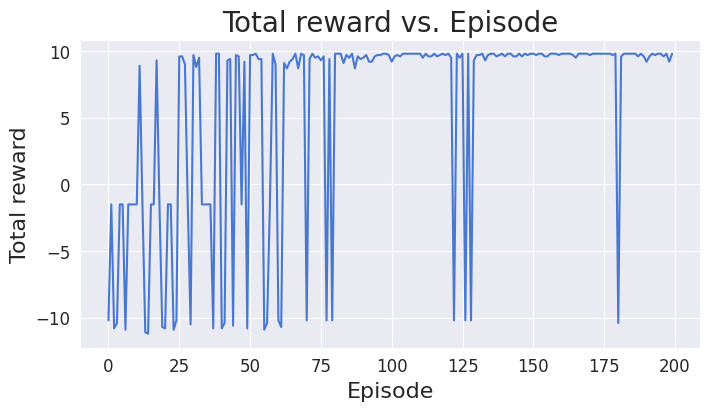

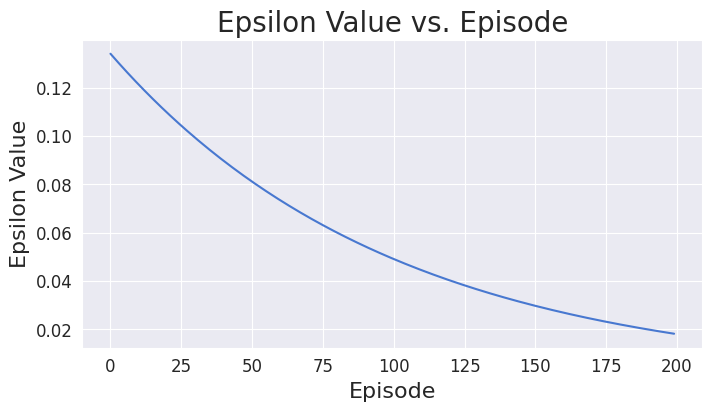

In [ ]:
gamma_2 = 0.8
q_learning_agent2 = QLearning(env, episodes, timesteps, alpha, gamma_2, epsilon, epsilon_decay, epsilon_min)
Q_G2, rewards_G2 = q_learning_agent2.run()

Parameter - 1 - gamma - 0.5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Current episode: 1, Epsilon Value: 0.9900, Total Reward: -1.5000000000000002
Current episode: 2, Epsilon Value: 0.9801, Total Reward: -1.5000000000000002
Current episode: 3, Epsilon Value: 0.9703, Total Reward: -10.3
Current episode: 4, Epsilon Value: 0.9606, Total Reward: 9.8
Current episode: 5, Epsilon Value: 0.9510, Total Reward: -10.3
Current episode: 6, Epsilon Value: 0.9415, Total Reward: -1.5000000000000002
Current episode: 7, Epsilon Value: 0.9321, Total Reward: -10.6
Current episode: 8, Epsilon Value: 0.9227, Total Reward: -10.4
Current episode: 9, Epsilon Value: 0.9135, Total Reward: -11.1
Current episode: 10, Epsilon Value: 0.9044, Total Reward: 9.1
Current episode: 11, Epsilon Value: 0.8953, Total Reward: -10.4
Current episode: 12, Epsilon Value: 0.8864, Total Reward: -1.5000000000000002
Current episode: 13, Epsilon Value: 0.8775, Total Reward: -10.2
Current episode: 14, Epsilon Value: 0.8687, Total Reward: -1.5000000000000002
Current episode: 15, Epsilon Value: 0.8601, Tot

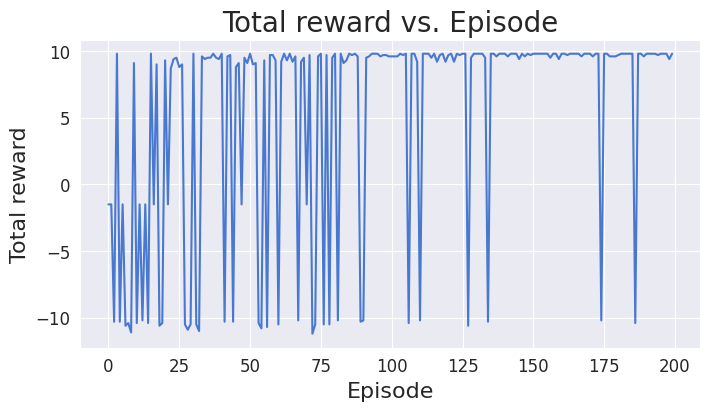

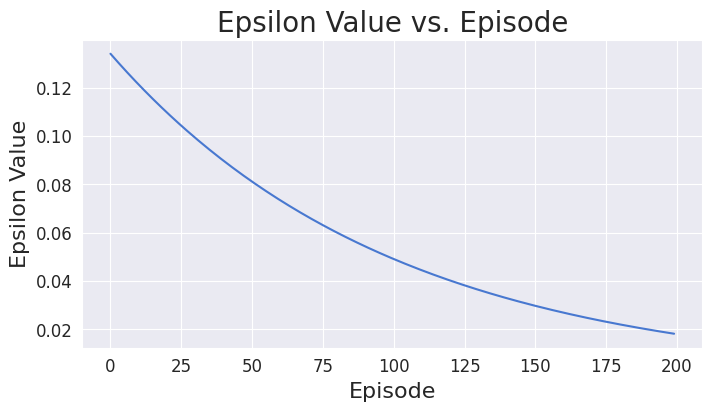

In [ ]:
gamma_3 = 0.5
q_learning_agent3 = QLearning(env, episodes, timesteps, alpha, gamma_3, epsilon, epsilon_decay, epsilon_min)
Q_G3, rewards_G3 = q_learning_agent3.run()

Parameter - 2 - epsilon_decays - 0.75

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Current episode: 1, Epsilon Value: 0.7500, Total Reward: -10.6
Current episode: 2, Epsilon Value: 0.5625, Total Reward: -1.5000000000000002
Current episode: 3, Epsilon Value: 0.4219, Total Reward: -10.9
Current episode: 4, Epsilon Value: 0.3164, Total Reward: -1.5000000000000002
Current episode: 5, Epsilon Value: 0.2373, Total Reward: -11.3
Current episode: 6, Epsilon Value: 0.1780, Total Reward: -10.7
Current episode: 7, Epsilon Value: 0.1335, Total Reward: -1.5000000000000002
Current episode: 8, Epsilon Value: 0.1001, Total Reward: 9.8
Current episode: 9, Epsilon Value: 0.0751, Total Reward: 8.8
Current episode: 10, Epsilon Value: 0.0563, Total Reward: -1.5000000000000002
Current episode: 11, Epsilon Value: 0.0422, Total Reward: 9.6
Current episode: 12, Epsilon Value: 0.0317, Total Reward: 9.8
Current episode: 13, Epsilon Value: 0.0238, Total Reward: 9.8
Current episode: 14, Epsilon Value: 0.0178, Total Reward: 9.8
Current episode: 15, Epsilon Value: 0.0134, Total Reward: 9.8
Current

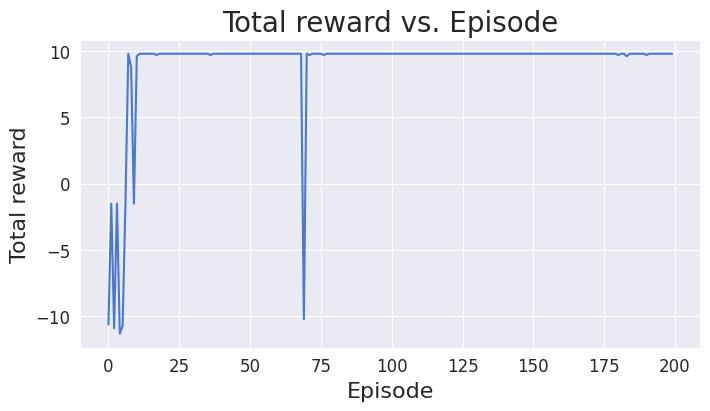

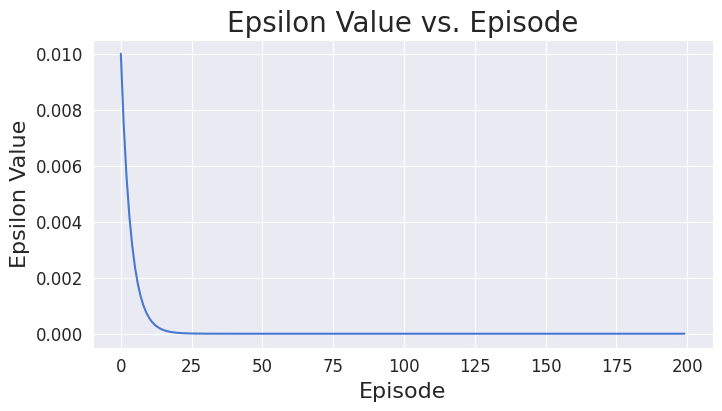

In [ ]:
epsilon_decay1 = 0.75
q_learning_agent_decay1 = QLearning(env, episodes, timesteps, alpha, gamma, epsilon, epsilon_decay1, epsilon_min)
Q_D1, rewards_D1 = q_learning_agent_decay1.run()

After modifying epsilon decay to 0.75, we can observe there is a good increase in the reward and the rewards are staying in the range of 5-10 after 20 episodes.

Parameter -2 : epislon decay = 0.80

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Current episode: 1, Epsilon Value: 0.8000, Total Reward: -1.5000000000000002
Current episode: 2, Epsilon Value: 0.6400, Total Reward: -10.4
Current episode: 3, Epsilon Value: 0.5120, Total Reward: -1.5000000000000002
Current episode: 4, Epsilon Value: 0.4096, Total Reward: -10.9
Current episode: 5, Epsilon Value: 0.3277, Total Reward: -1.5000000000000002
Current episode: 6, Epsilon Value: 0.2621, Total Reward: -10.2
Current episode: 7, Epsilon Value: 0.2097, Total Reward: -11.3
Current episode: 8, Epsilon Value: 0.1678, Total Reward: 9.8
Current episode: 9, Epsilon Value: 0.1342, Total Reward: -10.9
Current episode: 10, Epsilon Value: 0.1074, Total Reward: -1.5000000000000002
Current episode: 11, Epsilon Value: 0.0859, Total Reward: 9.8
Current episode: 12, Epsilon Value: 0.0687, Total Reward: 9.3
Current episode: 13, Epsilon Value: 0.0550, Total Reward: 9.8
Current episode: 14, Epsilon Value: 0.0440, Total Reward: 9.8
Current episode: 15, Epsilon Value: 0.0352, Total Reward: 9.7
Curre

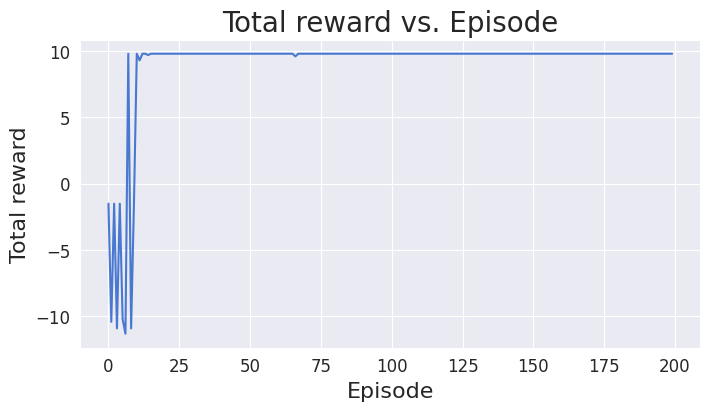

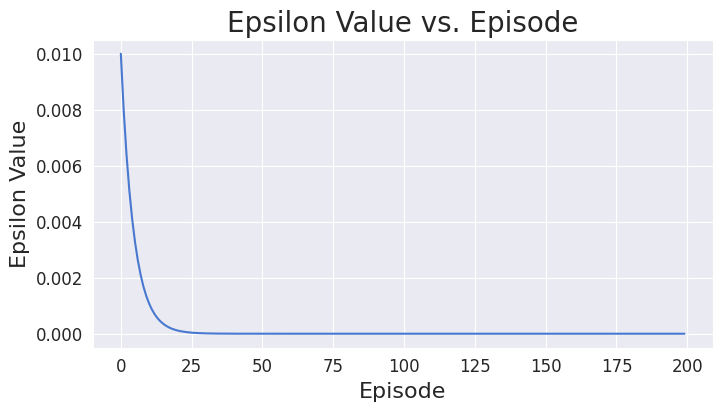

In [ ]:
epsilon_decay2 = 0.80
q_learning_agent_decay2 = QLearning(env, episodes, timesteps, alpha, gamma, epsilon, epsilon_decay2, epsilon_min)
Q_D2, rewards_D2 = q_learning_agent_decay2.run()

After increasing the decay, we can see the graph has been increasing and decreasing.

Parameter - 2: epsilon decay = 0.6

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Current episode: 1, Epsilon Value: 0.6000, Total Reward: 9.4
Current episode: 2, Epsilon Value: 0.3600, Total Reward: -1.5000000000000002
Current episode: 3, Epsilon Value: 0.2160, Total Reward: -10.6
Current episode: 4, Epsilon Value: 0.1296, Total Reward: 8.7
Current episode: 5, Epsilon Value: 0.0778, Total Reward: 9.6
Current episode: 6, Epsilon Value: 0.0467, Total Reward: 9.8
Current episode: 7, Epsilon Value: 0.0280, Total Reward: 9.8
Current episode: 8, Epsilon Value: 0.0168, Total Reward: 9.8
Current episode: 9, Epsilon Value: 0.0101, Total Reward: 9.8
Current episode: 10, Epsilon Value: 0.0100, Total Reward: 9.8
Current episode: 11, Epsilon Value: 0.0100, Total Reward: 9.8
Current episode: 12, Epsilon Value: 0.0100, Total Reward: 9.8
Current episode: 13, Epsilon Value: 0.0100, Total Reward: 9.8
Current episode: 14, Epsilon Value: 0.0100, Total Reward: 9.8
Current episode: 15, Epsilon Value: 0.0100, Total Reward: 9.8
Current episode: 16, Epsilon Value: 0.0100, Total Reward: 9.8

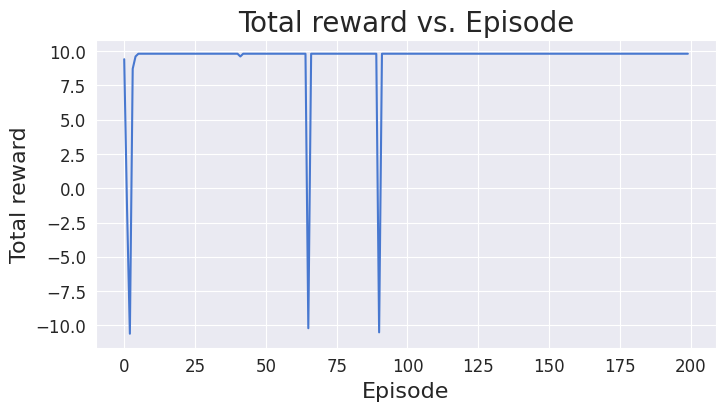

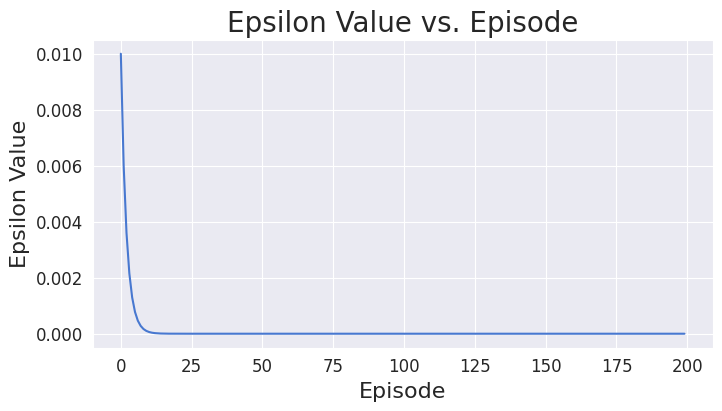

In [ ]:
epsilon_decay3 = 0.60
q_learning_agent_decay3 = QLearning(env, episodes, timesteps, alpha, gamma, epsilon, epsilon_decay3, epsilon_min)
Q_D3, rewards_D3 = q_learning_agent_decay3.run()

After decreasing the epsilon decay more to 0.60, the graph seems to be increasing from 20 episodes.

**Hyperparameter combination graphs**



chosen two hyperparameters with 3 different values will produce a combination of 9 graphs.

Current episode: 1, Epsilon Value: 0.7500, Total Reward: -10.6
Current episode: 2, Epsilon Value: 0.5625, Total Reward: -1.5000000000000002
Current episode: 3, Epsilon Value: 0.4219, Total Reward: -1.5000000000000002
Current episode: 4, Epsilon Value: 0.3164, Total Reward: -10.4
Current episode: 5, Epsilon Value: 0.2373, Total Reward: 8.8
Current episode: 6, Epsilon Value: 0.1780, Total Reward: -1.5000000000000002
Current episode: 7, Epsilon Value: 0.1335, Total Reward: 9.1
Current episode: 8, Epsilon Value: 0.1001, Total Reward: -10.6
Current episode: 9, Epsilon Value: 0.0751, Total Reward: 9.6
Current episode: 10, Epsilon Value: 0.0563, Total Reward: 9.8
Current episode: 11, Epsilon Value: 0.0422, Total Reward: 9.8
Current episode: 12, Epsilon Value: 0.0317, Total Reward: 9.8
Current episode: 13, Epsilon Value: 0.0238, Total Reward: 9.8
Current episode: 14, Epsilon Value: 0.0178, Total Reward: 9.8
Current episode: 15, Epsilon Value: 0.0134, Total Reward: 9.8
Current episode: 16, Epsi

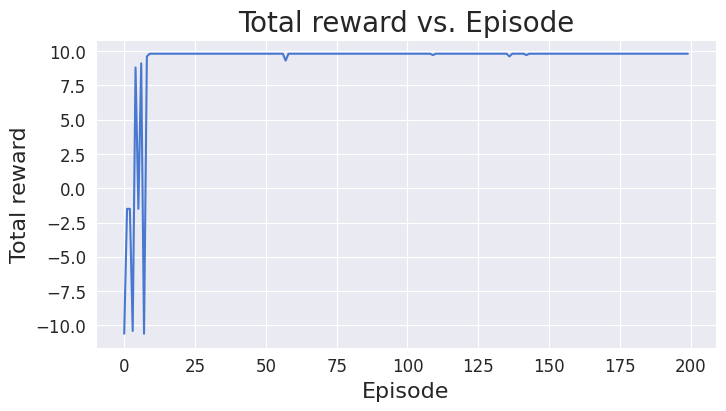

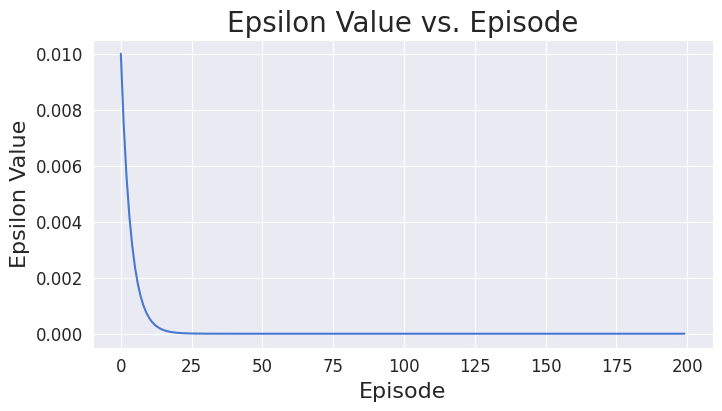

gamma: 0.90 - Epsilon Decay: 0.75 - Reward: 1862.30
Current episode: 1, Epsilon Value: 0.8000, Total Reward: -10.7
Current episode: 2, Epsilon Value: 0.6400, Total Reward: -1.5000000000000002
Current episode: 3, Epsilon Value: 0.5120, Total Reward: -1.5000000000000002
Current episode: 4, Epsilon Value: 0.4096, Total Reward: 8.8
Current episode: 5, Epsilon Value: 0.3277, Total Reward: -11.3
Current episode: 6, Epsilon Value: 0.2621, Total Reward: -10.8
Current episode: 7, Epsilon Value: 0.2097, Total Reward: 9.0
Current episode: 8, Epsilon Value: 0.1678, Total Reward: -11.1
Current episode: 9, Epsilon Value: 0.1342, Total Reward: 9.8
Current episode: 10, Epsilon Value: 0.1074, Total Reward: -10.2
Current episode: 11, Epsilon Value: 0.0859, Total Reward: 8.8
Current episode: 12, Epsilon Value: 0.0687, Total Reward: 9.8
Current episode: 13, Epsilon Value: 0.0550, Total Reward: 9.8
Current episode: 14, Epsilon Value: 0.0440, Total Reward: 9.7
Current episode: 15, Epsilon Value: 0.0352, Tot

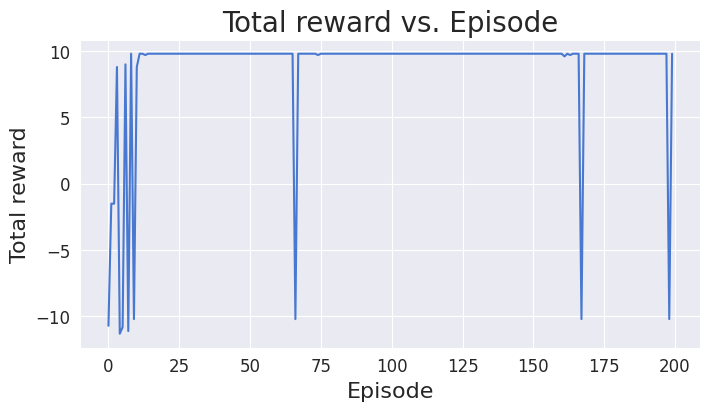

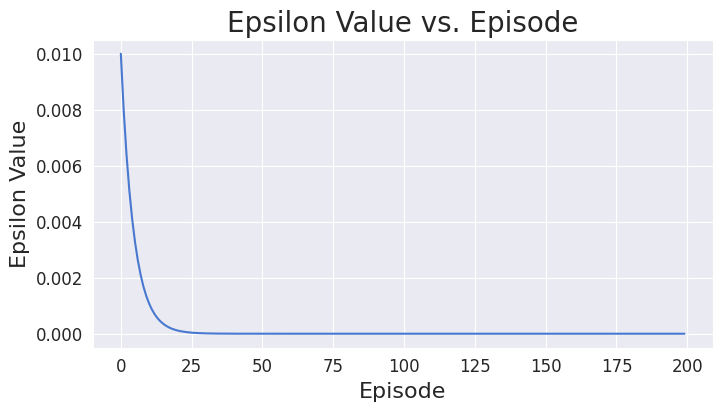

gamma: 0.90 - Epsilon Decay: 0.80 - Reward: 1771.00
Current episode: 1, Epsilon Value: 0.6000, Total Reward: -11.3
Current episode: 2, Epsilon Value: 0.3600, Total Reward: 9.7
Current episode: 3, Epsilon Value: 0.2160, Total Reward: 9.3
Current episode: 4, Epsilon Value: 0.1296, Total Reward: 8.9
Current episode: 5, Epsilon Value: 0.0778, Total Reward: 9.7
Current episode: 6, Epsilon Value: 0.0467, Total Reward: 9.8
Current episode: 7, Epsilon Value: 0.0280, Total Reward: 9.8
Current episode: 8, Epsilon Value: 0.0168, Total Reward: 9.8
Current episode: 9, Epsilon Value: 0.0101, Total Reward: 9.8
Current episode: 10, Epsilon Value: 0.0100, Total Reward: 9.8
Current episode: 11, Epsilon Value: 0.0100, Total Reward: 9.8
Current episode: 12, Epsilon Value: 0.0100, Total Reward: 9.8
Current episode: 13, Epsilon Value: 0.0100, Total Reward: 9.8
Current episode: 14, Epsilon Value: 0.0100, Total Reward: 9.8
Current episode: 15, Epsilon Value: 0.0100, Total Reward: 9.8
Current episode: 16, Epsi

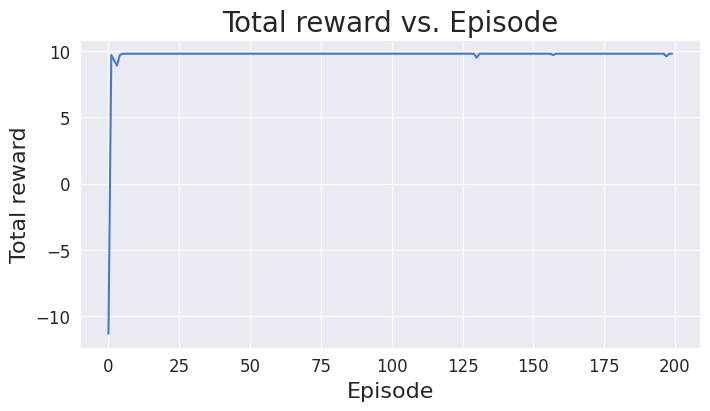

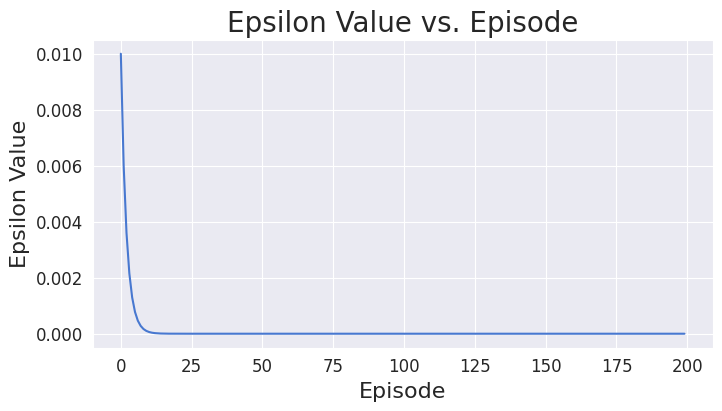

gamma: 0.90 - Epsilon Decay: 0.60 - Reward: 1936.70
Current episode: 1, Epsilon Value: 0.7500, Total Reward: -1.5000000000000002
Current episode: 2, Epsilon Value: 0.5625, Total Reward: -10.4
Current episode: 3, Epsilon Value: 0.4219, Total Reward: -11.2
Current episode: 4, Epsilon Value: 0.3164, Total Reward: -11.1
Current episode: 5, Epsilon Value: 0.2373, Total Reward: -1.5000000000000002
Current episode: 6, Epsilon Value: 0.1780, Total Reward: 9.7
Current episode: 7, Epsilon Value: 0.1335, Total Reward: 9.0
Current episode: 8, Epsilon Value: 0.1001, Total Reward: 9.4
Current episode: 9, Epsilon Value: 0.0751, Total Reward: 9.6
Current episode: 10, Epsilon Value: 0.0563, Total Reward: 9.8
Current episode: 11, Epsilon Value: 0.0422, Total Reward: 9.8
Current episode: 12, Epsilon Value: 0.0317, Total Reward: 9.8
Current episode: 13, Epsilon Value: 0.0238, Total Reward: 9.8
Current episode: 14, Epsilon Value: 0.0178, Total Reward: 9.8
Current episode: 15, Epsilon Value: 0.0134, Total R

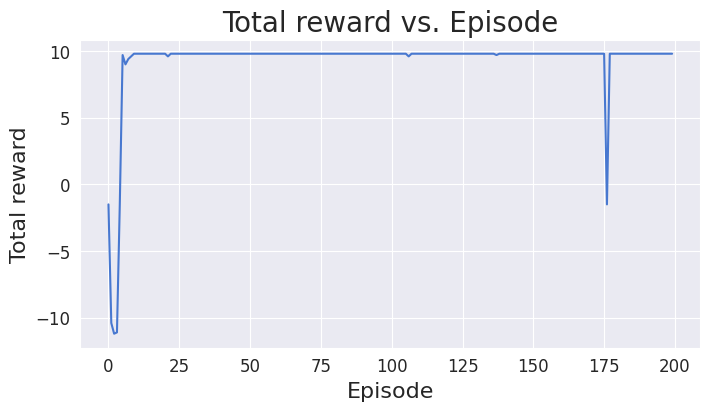

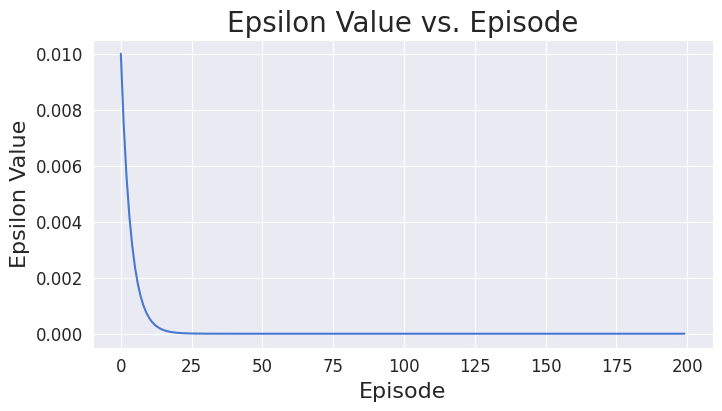

gamma: 0.80 - Epsilon Decay: 0.75 - Reward: 1862.00
Current episode: 1, Epsilon Value: 0.8000, Total Reward: -11.3
Current episode: 2, Epsilon Value: 0.6400, Total Reward: -10.8
Current episode: 3, Epsilon Value: 0.5120, Total Reward: -10.7
Current episode: 4, Epsilon Value: 0.4096, Total Reward: -11.0
Current episode: 5, Epsilon Value: 0.3277, Total Reward: -11.0
Current episode: 6, Epsilon Value: 0.2621, Total Reward: 9.0
Current episode: 7, Epsilon Value: 0.2097, Total Reward: -1.5000000000000002
Current episode: 8, Epsilon Value: 0.1678, Total Reward: 9.0
Current episode: 9, Epsilon Value: 0.1342, Total Reward: -1.5000000000000002
Current episode: 10, Epsilon Value: 0.1074, Total Reward: 9.6
Current episode: 11, Epsilon Value: 0.0859, Total Reward: -1.5000000000000002
Current episode: 12, Epsilon Value: 0.0687, Total Reward: 9.6
Current episode: 13, Epsilon Value: 0.0550, Total Reward: 9.8
Current episode: 14, Epsilon Value: 0.0440, Total Reward: 9.8
Current episode: 15, Epsilon Va

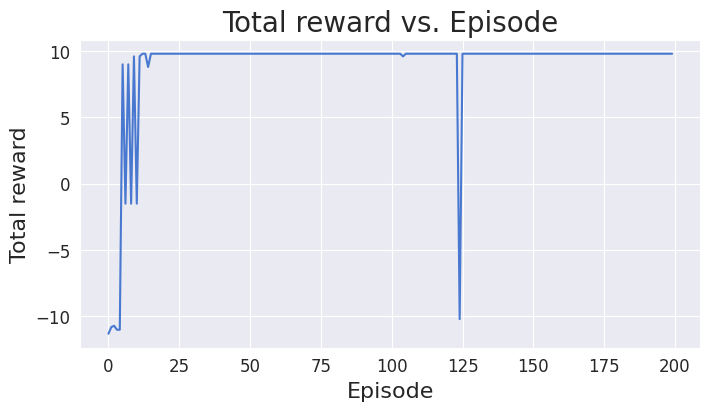

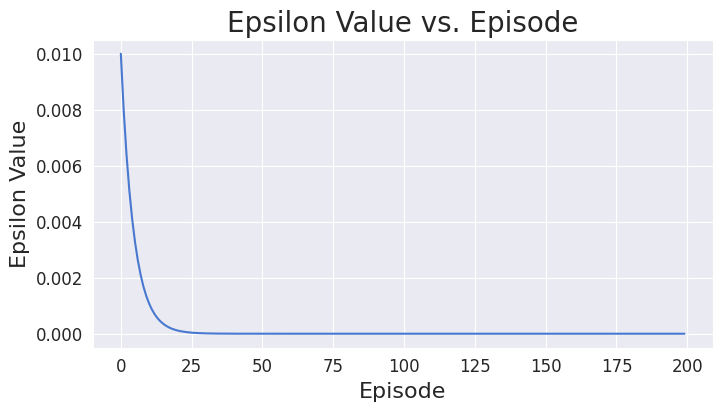

gamma: 0.80 - Epsilon Decay: 0.80 - Reward: 1799.10
Current episode: 1, Epsilon Value: 0.6000, Total Reward: -1.5000000000000002
Current episode: 2, Epsilon Value: 0.3600, Total Reward: -10.6
Current episode: 3, Epsilon Value: 0.2160, Total Reward: 8.7
Current episode: 4, Epsilon Value: 0.1296, Total Reward: -11.2
Current episode: 5, Epsilon Value: 0.0778, Total Reward: -1.5000000000000002
Current episode: 6, Epsilon Value: 0.0467, Total Reward: 9.8
Current episode: 7, Epsilon Value: 0.0280, Total Reward: 9.4
Current episode: 8, Epsilon Value: 0.0168, Total Reward: 9.8
Current episode: 9, Epsilon Value: 0.0101, Total Reward: 9.8
Current episode: 10, Epsilon Value: 0.0100, Total Reward: 9.8
Current episode: 11, Epsilon Value: 0.0100, Total Reward: 9.8
Current episode: 12, Epsilon Value: 0.0100, Total Reward: 9.8
Current episode: 13, Epsilon Value: 0.0100, Total Reward: 9.8
Current episode: 14, Epsilon Value: 0.0100, Total Reward: 9.8
Current episode: 15, Epsilon Value: 0.0100, Total Rew

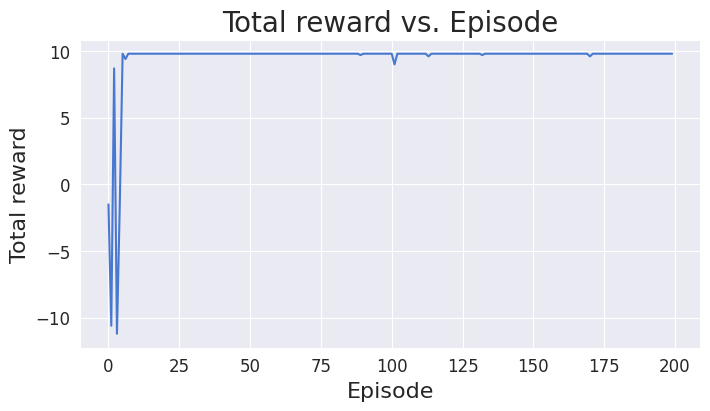

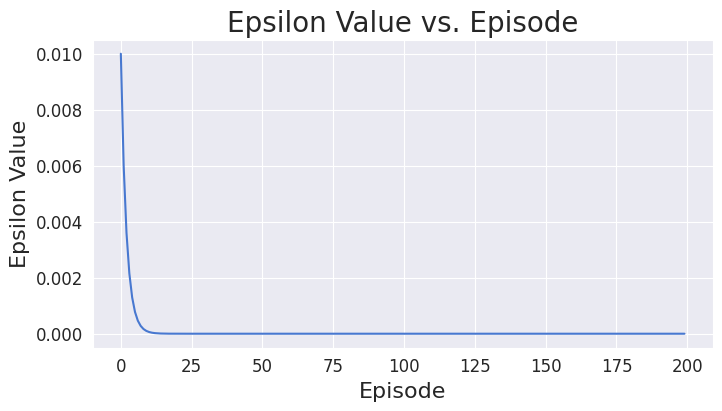

gamma: 0.80 - Epsilon Decay: 0.60 - Reward: 1893.10
Current episode: 1, Epsilon Value: 0.7500, Total Reward: -10.7
Current episode: 2, Epsilon Value: 0.5625, Total Reward: -1.5000000000000002
Current episode: 3, Epsilon Value: 0.4219, Total Reward: -11.1
Current episode: 4, Epsilon Value: 0.3164, Total Reward: 8.7
Current episode: 5, Epsilon Value: 0.2373, Total Reward: -10.6
Current episode: 6, Epsilon Value: 0.1780, Total Reward: -1.5000000000000002
Current episode: 7, Epsilon Value: 0.1335, Total Reward: 9.6
Current episode: 8, Epsilon Value: 0.1001, Total Reward: 9.4
Current episode: 9, Epsilon Value: 0.0751, Total Reward: 8.9
Current episode: 10, Epsilon Value: 0.0563, Total Reward: 9.8
Current episode: 11, Epsilon Value: 0.0422, Total Reward: 9.8
Current episode: 12, Epsilon Value: 0.0317, Total Reward: 9.8
Current episode: 13, Epsilon Value: 0.0238, Total Reward: 9.8
Current episode: 14, Epsilon Value: 0.0178, Total Reward: 9.8
Current episode: 15, Epsilon Value: 0.0134, Total R

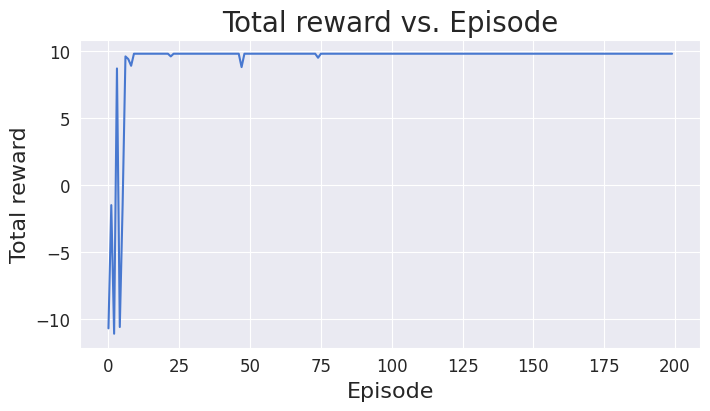

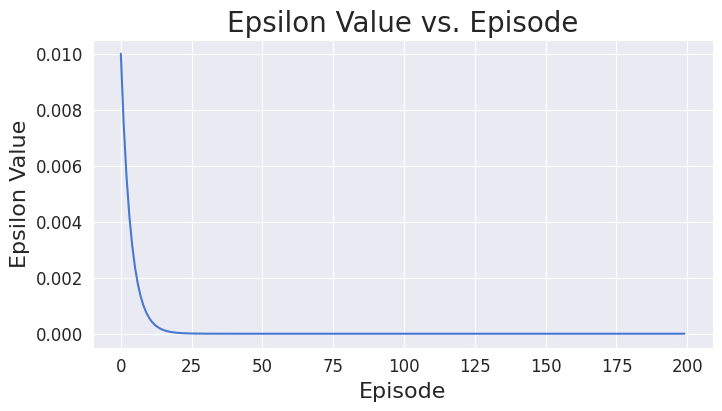

gamma: 0.50 - Epsilon Decay: 0.75 - Reward: 1871.50
Current episode: 1, Epsilon Value: 0.8000, Total Reward: -10.5
Current episode: 2, Epsilon Value: 0.6400, Total Reward: -1.5000000000000002
Current episode: 3, Epsilon Value: 0.5120, Total Reward: -10.8
Current episode: 4, Epsilon Value: 0.4096, Total Reward: -1.5000000000000002
Current episode: 5, Epsilon Value: 0.3277, Total Reward: 8.9
Current episode: 6, Epsilon Value: 0.2621, Total Reward: -1.5000000000000002
Current episode: 7, Epsilon Value: 0.2097, Total Reward: -1.5000000000000002
Current episode: 8, Epsilon Value: 0.1678, Total Reward: 9.0
Current episode: 9, Epsilon Value: 0.1342, Total Reward: 9.7
Current episode: 10, Epsilon Value: 0.1074, Total Reward: -1.5000000000000002
Current episode: 11, Epsilon Value: 0.0859, Total Reward: 9.8
Current episode: 12, Epsilon Value: 0.0687, Total Reward: 9.8
Current episode: 13, Epsilon Value: 0.0550, Total Reward: 9.8
Current episode: 14, Epsilon Value: 0.0440, Total Reward: 9.8
Curre

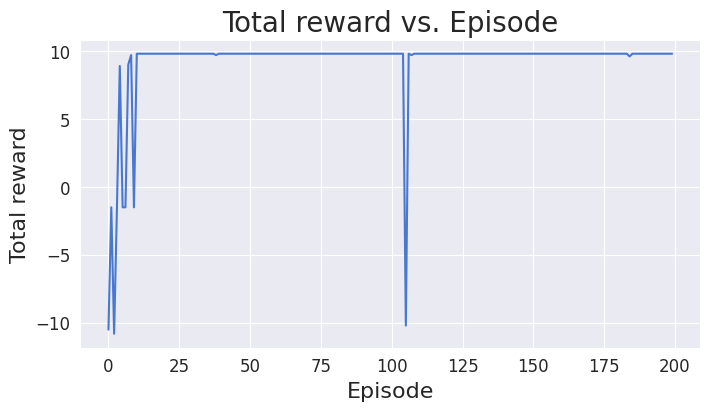

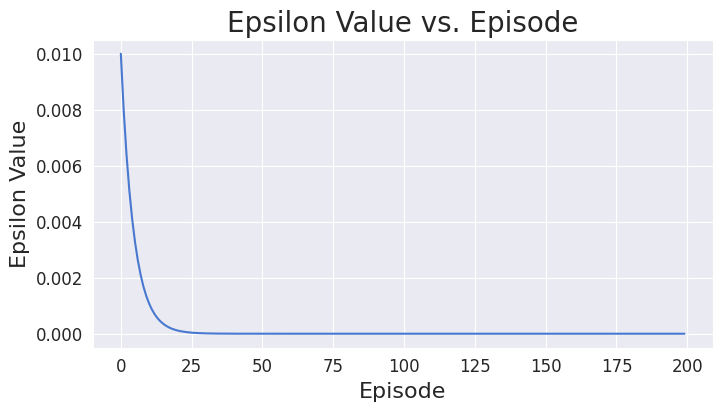

gamma: 0.50 - Epsilon Decay: 0.80 - Reward: 1840.40
Current episode: 1, Epsilon Value: 0.6000, Total Reward: -1.5000000000000002
Current episode: 2, Epsilon Value: 0.3600, Total Reward: -1.5000000000000002
Current episode: 3, Epsilon Value: 0.2160, Total Reward: -10.7
Current episode: 4, Epsilon Value: 0.1296, Total Reward: -10.7
Current episode: 5, Epsilon Value: 0.0778, Total Reward: -1.5000000000000002
Current episode: 6, Epsilon Value: 0.0467, Total Reward: -10.7
Current episode: 7, Epsilon Value: 0.0280, Total Reward: 9.8
Current episode: 8, Epsilon Value: 0.0168, Total Reward: -1.5000000000000002
Current episode: 9, Epsilon Value: 0.0101, Total Reward: 9.7
Current episode: 10, Epsilon Value: 0.0100, Total Reward: 9.2
Current episode: 11, Epsilon Value: 0.0100, Total Reward: 9.6
Current episode: 12, Epsilon Value: 0.0100, Total Reward: 9.8
Current episode: 13, Epsilon Value: 0.0100, Total Reward: 9.8
Current episode: 14, Epsilon Value: 0.0100, Total Reward: 9.8
Current episode: 15

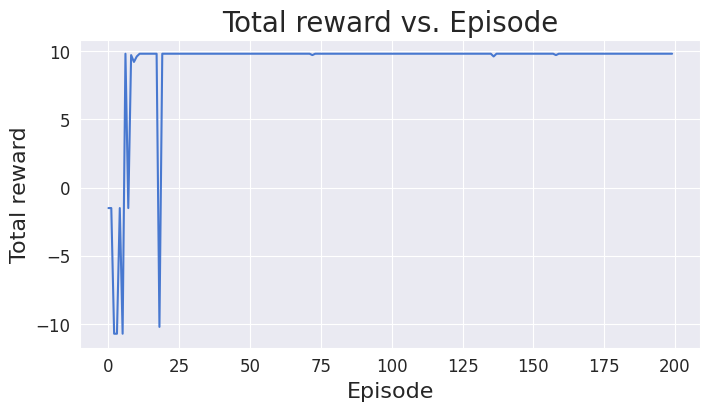

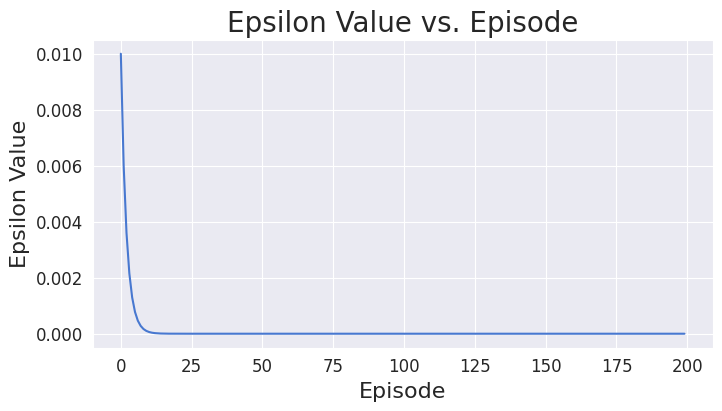

gamma: 0.50 - Epsilon Decay: 0.60 - Reward: 1832.00


In [ ]:
#Defining the hyperparameters to be tested
gamma_values = [0.9, 0.8, 0.5]
epsilon_decay_values = [0.75, 0.80, 0.60]

#Using the best parameters and reward to be returned at the end
best_reward = float('-inf')
best_parameter = {}

#Looping over all the hyperparameters to train the agent
for gamma in gamma_values:
    for epsilon_decay in epsilon_decay_values:
        agent = QLearning(env, episodes, timesteps, alpha, gamma, epsilon, epsilon_decay, epsilon_min)
        Q, rewards = agent.run()
        aggregated_reward = sum(rewards)
        
        #Checking if the current hyperparameters give the best reward so far
        if aggregated_reward > best_reward:
            best_reward = aggregated_reward
            best_agent = agent
            best_parameter = {'gamma': gamma, 'epsilon_decay': epsilon_decay}
            
        #Printing the results for the current hyperparameters
        print(f"gamma: {gamma:.2f} - Epsilon Decay: {epsilon_decay:.2f} - Reward: {aggregated_reward:.2f}")

**Diplaying the best parameters after hyperparameter tuning and plotting the reward graph**


Best Parameters: gamma=0.90, epsilon_decay=0.60, reward=1936.70


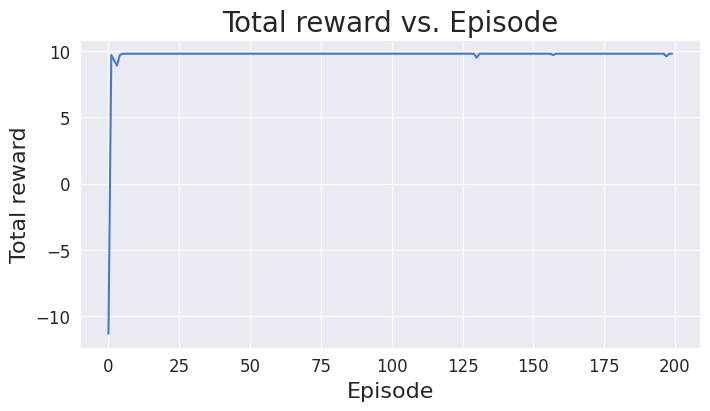

In [ ]:
#Printing the best parameters and it's reward
print(f"\nBest Parameters: gamma={best_parameter['gamma']:.2f}, epsilon_decay={best_parameter['epsilon_decay']:.2f}, reward={best_reward:.2f}")
#Plotting the rewards obtained during training with the best agent
best_agent.plot_rewards()

**Comparing both SARSA and QLearning on our previously built Enivornment**

Episode: 1, Epsilon Value: 0.9900, Total Reward: -10.2
Episode: 2, Epsilon Value: 0.9801, Total Reward: -10.5
Episode: 3, Epsilon Value: 0.9703, Total Reward: -1.5000000000000002
Episode: 4, Epsilon Value: 0.9606, Total Reward: -10.8
Episode: 5, Epsilon Value: 0.9510, Total Reward: -1.5000000000000002
Episode: 6, Epsilon Value: 0.9415, Total Reward: -11.3
Episode: 7, Epsilon Value: 0.9321, Total Reward: -1.5000000000000002
Episode: 8, Epsilon Value: 0.9227, Total Reward: -1.5000000000000002
Episode: 9, Epsilon Value: 0.9135, Total Reward: -1.5000000000000002
Episode: 10, Epsilon Value: 0.9044, Total Reward: -10.4
Episode: 11, Epsilon Value: 0.8953, Total Reward: -1.5000000000000002
Episode: 12, Epsilon Value: 0.8864, Total Reward: -1.5000000000000002
Episode: 13, Epsilon Value: 0.8775, Total Reward: 9.5
Episode: 14, Epsilon Value: 0.8687, Total Reward: 9.1
Episode: 15, Epsilon Value: 0.8601, Total Reward: -1.5000000000000002
Episode: 16, Epsilon Value: 0.8515, Total Reward: 9.6
Episode

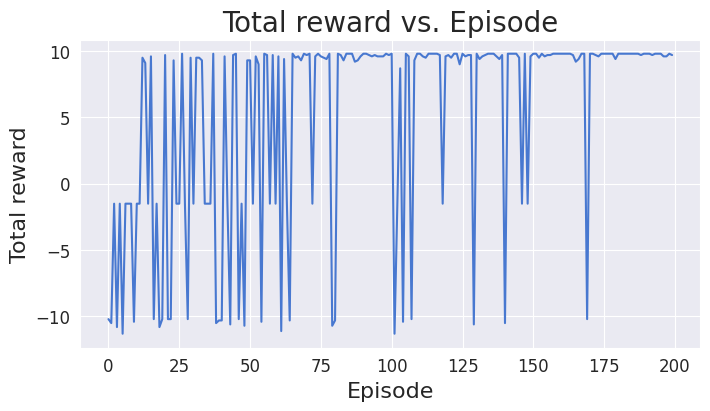

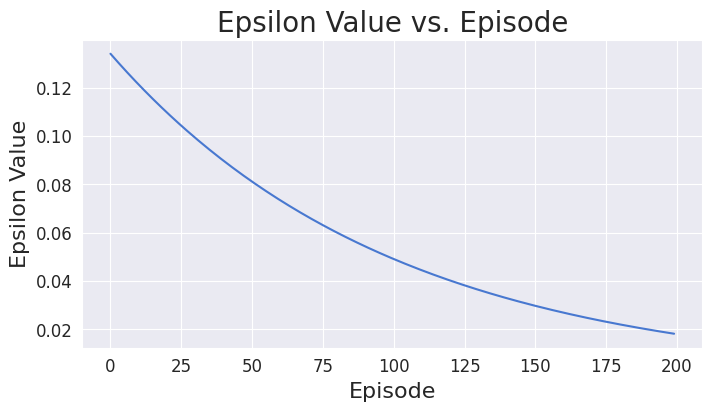

Current episode: 1, Epsilon Value: 0.9900, Total Reward: -1.5000000000000002
Current episode: 2, Epsilon Value: 0.9801, Total Reward: -1.5000000000000002
Current episode: 3, Epsilon Value: 0.9703, Total Reward: -1.5000000000000002
Current episode: 4, Epsilon Value: 0.9606, Total Reward: -10.8
Current episode: 5, Epsilon Value: 0.9510, Total Reward: 9.6
Current episode: 6, Epsilon Value: 0.9415, Total Reward: -10.3
Current episode: 7, Epsilon Value: 0.9321, Total Reward: -11.0
Current episode: 8, Epsilon Value: 0.9227, Total Reward: -1.5000000000000002
Current episode: 9, Epsilon Value: 0.9135, Total Reward: -1.5000000000000002
Current episode: 10, Epsilon Value: 0.9044, Total Reward: -1.5000000000000002
Current episode: 11, Epsilon Value: 0.8953, Total Reward: 9.4
Current episode: 12, Epsilon Value: 0.8864, Total Reward: 9.2
Current episode: 13, Epsilon Value: 0.8775, Total Reward: -10.2
Current episode: 14, Epsilon Value: 0.8687, Total Reward: 9.3
Current episode: 15, Epsilon Value: 0

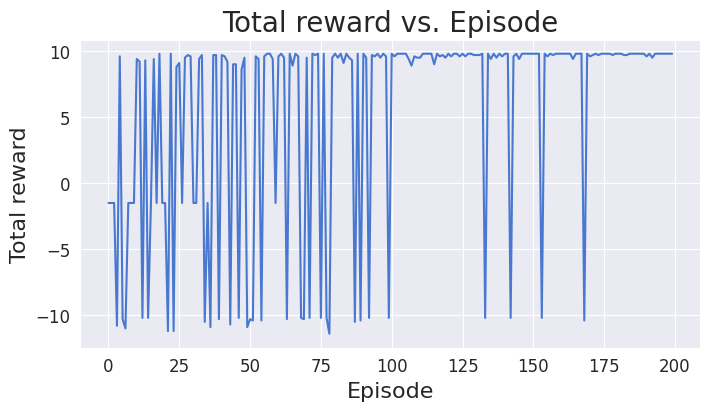

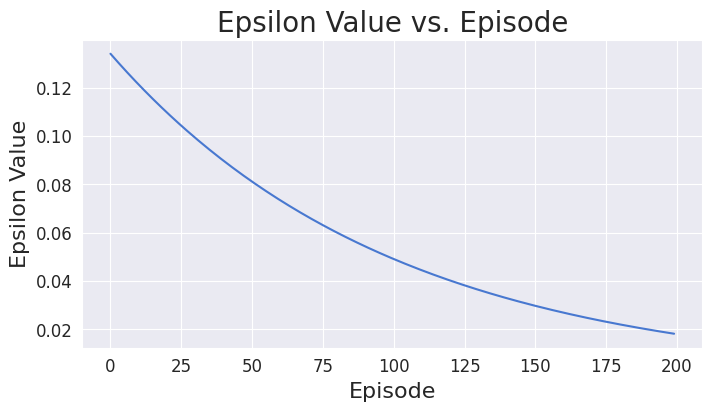

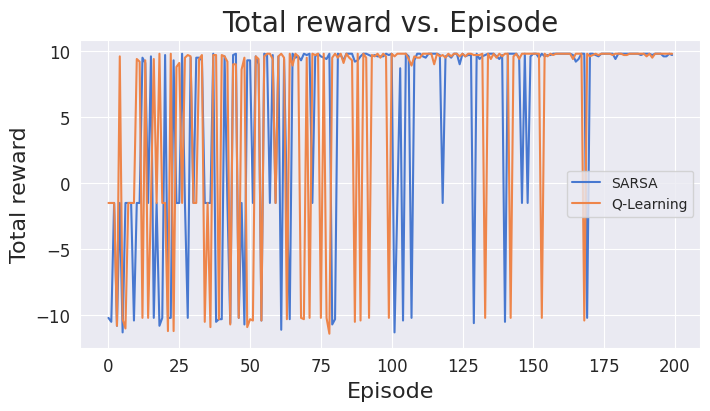

In [ ]:
# Creating the FrozenLake environment
env = GemHuntEnv()

# Training SARSA
sarsa = SARSA(env, num_episodes=200, max_timesteps=15, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01)
sarsa_q, sarsa_rewards = sarsa.run()

# Training Q-Learning
q_learning = QLearning(env, num_episodes=200, max_timesteps=15, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01)
q_learning_q, q_learning_rewards = q_learning.run()

# Plotting the results
sns.set_style('darkgrid')
sns.set_palette('muted')
plt.figure(figsize=(8, 4))
sns.lineplot(x=range(len(sarsa_rewards)), y=sarsa_rewards, label='SARSA')
sns.lineplot(x=range(len(q_learning_rewards)), y=q_learning_rewards, label='Q-Learning')
plt.title('Total reward vs. Episode', fontsize=20)
plt.xlabel('Episode', fontsize=16)
plt.ylabel('Total reward', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend()
plt.show()